In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [14]:
df = pd.read_csv("Event 3.csv", skiprows=[0,1,2,4])

df

,Time,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
0,0,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
1,208,-0.00433,-0.00151,-0.00162,-0.000095,0.0451,0.0673,-0.245,-0.00055,0.00031,...,-0.0233,-0.000081,0.000039,0.000175,-0.0811,0.134,-0.0558,-0.0013,0.000744,0.00124
2,417,-2.95000,0.12900,2.90000,-0.086500,185.0000,9.0200,-192.000,-0.14800,0.07700,...,-14.1000,0.010300,-0.000550,-0.010100,21.5000,0.458,-21.4000,-0.0853,0.004690,0.08550
3,625,-59.60000,0.95300,60.30000,-1.700000,4820.0000,238.0000,-5050.000,-4.28000,2.17000,...,-1570.0000,0.698000,-0.047000,-0.680000,1770.0000,22.800,-1780.0000,-6.5300,0.265000,6.45000
4,833,-122.00000,-8.76000,132.00000,-1.750000,11400.0000,1070.0000,-12400.000,-13.10000,6.15000,...,-7040.0000,2.320000,-0.005850,-2.380000,6820.0000,40.700,-7330.0000,-30.2000,-0.263000,30.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.00000,2.91000,104.00000,0.141000,10000.0000,-246.0000,-9790.000,-31.00000,23.60000,...,-7590.0000,13.300000,-6.170000,-7.110000,9710.0000,-1950.000,-7750.0000,-123.0000,34.500000,88.90000
96002,20000289,-102.00000,-6.67000,109.00000,0.151000,9570.0000,647.0000,-10200.000,-31.60000,21.70000,...,-8080.0000,13.200000,-5.220000,-7.940000,9400.0000,-1140.000,-8240.0000,-120.0000,24.600000,95.60000
96003,20000497,-96.80000,-16.20000,113.00000,0.159000,9050.0000,1540.0000,-10600.000,-32.00000,19.70000,...,-8520.0000,13.000000,-4.240000,-8.730000,9040.0000,-328.000,-8670.0000,-116.0000,14.600000,102.00000
96004,20000705,-90.60000,-25.70000,116.00000,0.167000,8470.0000,2420.0000,-10900.000,-32.20000,17.60000,...,-8910.0000,12.700000,-3.230000,-9.470000,8610.0000,491.000,-9060.0000,-112.0000,4.530000,107.00000


In [15]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df[df['Time'] > 0.25e6].iloc[:, 1:]
data

,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,C_CTWE1_C,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
1201,-104.0,-3.02,107.0,0.145,9770.0,307.0,-10100.0,-30.1,21.1,9.02,...,-8230.0,13.4,-5.26,-8.12,9580.0,-1220.0,-8330.0,-86.5,19.90,66.5
1202,-99.1,-12.60,112.0,0.163,9260.0,1200.0,-10500.0,-30.6,19.2,11.30,...,-8690.0,13.2,-4.26,-8.92,9210.0,-389.0,-8780.0,-83.9,12.90,71.0
1203,-93.1,-22.20,115.0,0.181,8710.0,2090.0,-10800.0,-30.8,17.2,13.50,...,-9080.0,12.9,-3.24,-9.66,8780.0,442.0,-9180.0,-80.8,5.73,75.1
1204,-86.5,-31.60,118.0,0.196,8090.0,2970.0,-11100.0,-30.8,15.1,15.70,...,-9430.0,12.5,-2.19,-10.40,8300.0,1270.0,-9520.0,-77.3,-1.46,78.7
1205,-79.4,-40.80,120.0,0.212,7430.0,3820.0,-11300.0,-30.7,13.0,17.70,...,-9710.0,12.1,-1.14,-11.00,7770.0,2090.0,-9800.0,-73.2,-8.63,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.0,2.91,104.0,0.141,10000.0,-246.0,-9790.0,-31.0,23.6,7.48,...,-7590.0,13.3,-6.17,-7.11,9710.0,-1950.0,-7750.0,-123.0,34.50,88.9
96002,-102.0,-6.67,109.0,0.151,9570.0,647.0,-10200.0,-31.6,21.7,9.91,...,-8080.0,13.2,-5.22,-7.94,9400.0,-1140.0,-8240.0,-120.0,24.60,95.6
96003,-96.8,-16.20,113.0,0.159,9050.0,1540.0,-10600.0,-32.0,19.7,12.30,...,-8520.0,13.0,-4.24,-8.73,9040.0,-328.0,-8670.0,-116.0,14.60,102.0
96004,-90.6,-25.70,116.0,0.167,8470.0,2420.0,-10900.0,-32.2,17.6,14.60,...,-8910.0,12.7,-3.23,-9.47,8610.0,491.0,-9060.0,-112.0,4.53,107.0


In [16]:
df_test = pd.read_csv("Event 1.csv", skiprows=[0,1,2,4])

df_test


,Time,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
0,0,-0.0149,-0.00584,-0.00172,-0.0135,0.0451,0.0673,-0.245,-0.00055,0.000208,...,-0.0233,-0.000081,0.000171,0.000163,0.000265,-0.150,0.00251,-0.00124,-0.000322,-0.0151
1,208,-0.0149,-0.00584,-0.00172,-0.0135,0.0451,0.0673,-0.245,-0.00055,0.000208,...,-0.0233,-0.000081,0.000171,0.000163,0.000265,-0.150,0.00251,-0.00124,-0.000322,-0.0151
2,417,-2.9600,0.12500,2.90000,-0.0986,185.0000,9.0200,-192.000,-0.14800,0.077300,...,-14.1000,0.010300,-0.000447,-0.010100,21.600000,0.555,-21.60000,-0.08520,-0.000322,0.0864
3,625,-59.6000,0.96200,60.30000,-1.7200,4820.0000,238.0000,-5050.000,-4.28000,2.170000,...,-1570.0000,0.698000,-0.047500,-0.680000,1770.000000,22.700,-1780.00000,-6.53000,0.252000,6.4500
4,833,-122.0000,-8.75000,132.00000,-1.7400,11400.0000,1070.0000,-12400.000,-13.10000,6.150000,...,-7040.0000,2.320000,-0.005400,-2.380000,6820.000000,40.700,-7330.00000,-30.20000,-0.253000,30.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,20000080,-107.0000,2.92000,104.00000,0.1280,10000.0000,-246.0000,-9790.000,-31.00000,23.600000,...,-7590.0000,13.300000,-6.170000,-7.110000,9710.000000,-1950.000,-7750.00000,-123.00000,34.500000,88.9000
96002,20000289,-102.0000,-6.68000,109.00000,0.1570,9570.0000,647.0000,-10200.000,-31.60000,21.700000,...,-8080.0000,13.200000,-5.220000,-7.940000,9400.000000,-1140.000,-8240.00000,-120.00000,24.600000,95.6000
96003,20000497,-96.8000,-16.20000,113.00000,0.1570,9050.0000,1540.0000,-10600.000,-32.00000,19.700000,...,-8520.0000,13.000000,-4.240000,-8.730000,9040.000000,-328.000,-8670.00000,-116.00000,14.600000,102.0000
96004,20000705,-90.6000,-25.70000,116.00000,0.1570,8470.0000,2420.0000,-10900.000,-32.20000,17.600000,...,-8910.0000,12.700000,-3.230000,-9.470000,8610.000000,491.000,-9060.00000,-112.00000,4.550000,107.0000


In [17]:
data_test = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]

data_test

,C_CTWE5_A,C_CTWE5_B,C_CTWE5_C,C_CTWE5_N,V_PTWE4_AN,V_PTWE4_BN,V_PTWE4_CN,C_CTWE1_A,C_CTWE1_B,C_CTWE1_C,...,V_PT_FDR32_CN,C_CT_FDR32_A,C_CT_FDR32_B,C_CT_FDR32_C,V_PT_FDR12_AN,V_PT_FDR12_BN,V_PT_FDR12_CN,C_CT_FDR12_A,C_CT_FDR12_B,C_CT_FDR12_C
1201,-104.0,-3.01,107.0,0.157,9770.0,307.0,-10100.0,-30.1,21.1,9.02,...,-8230.0,13.4,-5.26,-8.12,9580.0,-1220.0,-8330.0,-86.5,20.00,66.5
1202,-99.1,-12.60,112.0,0.157,9260.0,1200.0,-10500.0,-30.6,19.2,11.30,...,-8690.0,13.2,-4.26,-8.92,9210.0,-389.0,-8780.0,-83.9,12.90,71.0
1203,-93.1,-22.20,115.0,0.185,8710.0,2090.0,-10800.0,-30.8,17.2,13.50,...,-9080.0,12.9,-3.24,-9.66,8780.0,442.0,-9180.0,-80.8,5.74,75.1
1204,-86.5,-31.60,118.0,0.185,8090.0,2970.0,-11100.0,-30.8,15.2,15.70,...,-9430.0,12.5,-2.19,-10.40,8300.0,1270.0,-9520.0,-77.3,-1.44,78.7
1205,-79.4,-40.80,120.0,0.214,7430.0,3820.0,-11300.0,-30.7,13.0,17.70,...,-9710.0,12.1,-1.14,-11.00,7770.0,2090.0,-9800.0,-73.2,-8.63,81.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96001,-107.0,2.92,104.0,0.128,10000.0,-246.0,-9790.0,-31.0,23.6,7.48,...,-7590.0,13.3,-6.17,-7.11,9710.0,-1950.0,-7750.0,-123.0,34.50,88.9
96002,-102.0,-6.68,109.0,0.157,9570.0,647.0,-10200.0,-31.6,21.7,9.91,...,-8080.0,13.2,-5.22,-7.94,9400.0,-1140.0,-8240.0,-120.0,24.60,95.6
96003,-96.8,-16.20,113.0,0.157,9050.0,1540.0,-10600.0,-32.0,19.7,12.30,...,-8520.0,13.0,-4.24,-8.73,9040.0,-328.0,-8670.0,-116.0,14.60,102.0
96004,-90.6,-25.70,116.0,0.157,8470.0,2420.0,-10900.0,-32.2,17.6,14.60,...,-8910.0,12.7,-3.23,-9.47,8610.0,491.0,-9060.0,-112.0,4.55,107.0


In [18]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1:[29,65], 2:[30,66], 3:[31,67], 5:[12,26,19,62], 6:[13,27,20,63], 7:[14,28,21,64], 8:[15,22],
            9:[16,23], 10:[17,24], 12:[5,26,33], 13:[6,27,34], 14:[7,28,35], 15:[8,29,52], 16:[9,53,30],
            17:[10,54,31], 19:[26,5,33], 20:[27,34,6], 21:[28,35,7], 22:[8,36], 23:[9,37], 24:[10,38],
            26:[12,33,5,19], 27:[13,20,34,6], 28:[14,21,35,7], 29:[1,65,15,48], 30:[2,66,49,16],
            31:[3,67,50,17], 33:[56,19,26,12], 34:[57,13,27,20], 35:[58,14,28,21], 36:[22,40], 37:[23,41],
            38:[24,42], 40:[36,48], 41:[37,49], 42:[38,50], 44:[52,59], 45:[53,60], 46:[54,61], 48:[40,52,29],
            49:[53,30,41], 50:[31,42,54], 52:[44,59,48,15],53:[45,60,49,16],54:[17,50,46,61], 56:[33,74,68,59],
            57:[34,75,69,60], 58:[35,76,70,61], 59:[71,77,44,52,56], 60:[45,78,72,53,57],61:[46,79,73,54,58],
            62:[5,86,80,65], 63:[6,87,81,66],64:[7,88,82,67], 65:[29,1,89,83,62], 66:[2,30,90,84,63],
            67:[85,91,3,31,64], 68:[56,74,71], 69:[57,75,72], 70:[58,76,73], 71:[59,77,68], 72:[60,78,69],
            73:[79,61,70], 74:[56,68,77], 75:[57,69,78], 76:[58,70,79],77:[74,59,71], 78:[60,72,75], 79:[61,73,76],
            80:[62,86,83], 81:[63,87,84], 82:[64,88,85], 83:[89,65,80],84:[90,66,81], 85:[91,67,82], 86:[62,80,89],
            87:[63,81,90], 88:[64,82,91], 89:[86,65,83], 90:[66,84,87],91:[85,67,88]}

# note: this adjacency matrix is 0 on the diagonal
# adj_matrix = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]])

# index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'), 56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'), 5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))
    
all_attack_times

{(1.1, 2.1),
 (2.3, 3.0),
 (5.0, 5.9),
 (6.6, 7.8),
 (9.0, 10.1),
 (10.5, 11.7),
 (16.2, 17.0),
 (17.4, 18.3)}

In [19]:
# delete low correlations

for i in [36, 37, 38]:
    del adj_list[i][-1]

In [20]:
def correlation_pair(dataframe, var1_index, var2_index, window):
    
    return dataframe.iloc[:, var1_index].rolling(window).corr(dataframe.iloc[:, var2_index])[window-1:]


def correlation_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_pair(dataframe, var1_index, var2_index, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs
    
def correlation_multi(dataframe, var1_index, var2_indices, window):
    
    corrs = []
    for var2_index in var2_indices:
        corrs.append(correlation_pair(dataframe, var1_index, var2_index, window))
    
    return np.prod(corrs, axis=0)


def correlation_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):
    
    corrs = correlation_multi(dataframe, var1_index, var2_indices, window)
    
    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
    plt.plot(corrs)
    
    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
    
    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    
    plt.show()
    
    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(corrs, bins=500)
        plt.show()
    
    return corrs

define a classification threshold (also called the decision threshold). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

The following sections take a closer look at metrics you can use to evaluate a classification model's predictions, as well as the impact of changing the classification threshold on these predictions.


In [21]:
def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''
    
    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
  return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change. 
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''
    
    # calculate difference btw each time step
    diff = np.diff(stat, n=1)
    
    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    return csum[window:] - csum[:-window]
    
        
def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window
    
    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on 
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''
    
    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)
    
    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################
    
    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):
  
  
  test_stat = fn(stat, window, axis=axis)

  return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)
    
    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()
        
    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''
    
    labels = get_labels(y_true)
    
    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)
    
    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):
    
    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)
    
    return metrics

def get_scores(y_true, y_pred):

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  return accuracy, precision, recall, f1


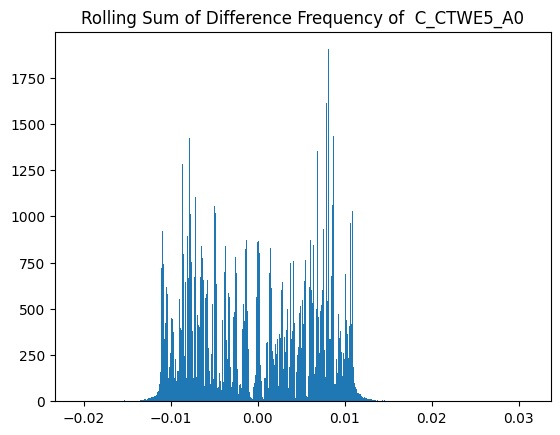

******************************************************************************


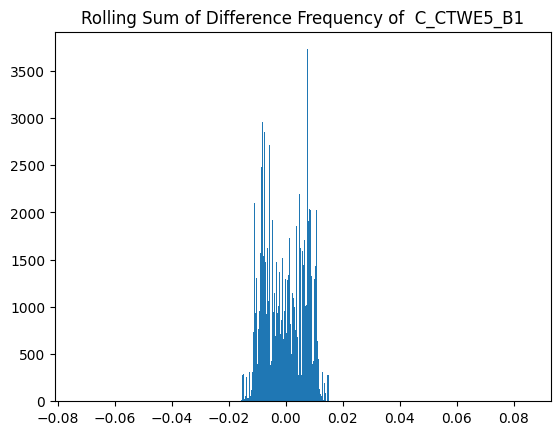

******************************************************************************


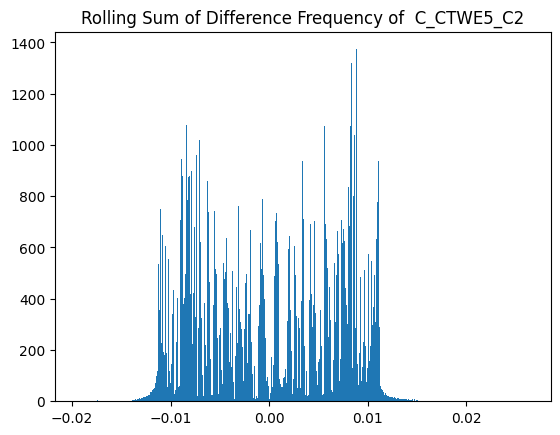

******************************************************************************


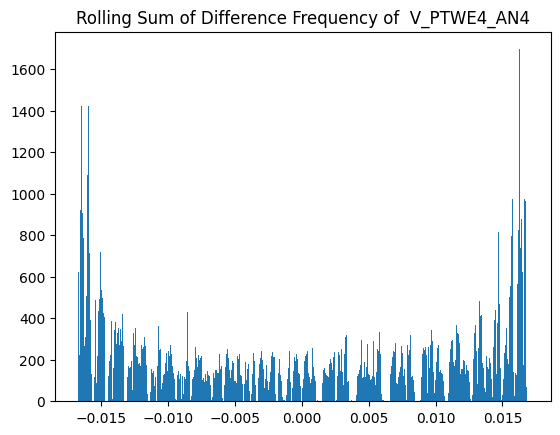

******************************************************************************


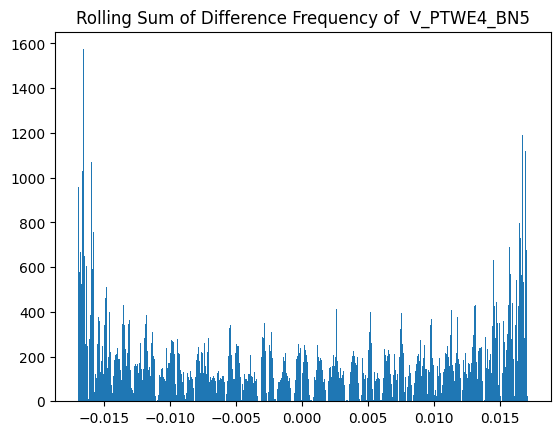

******************************************************************************


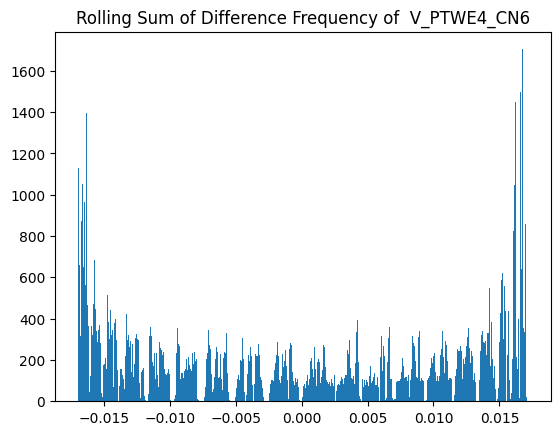

******************************************************************************


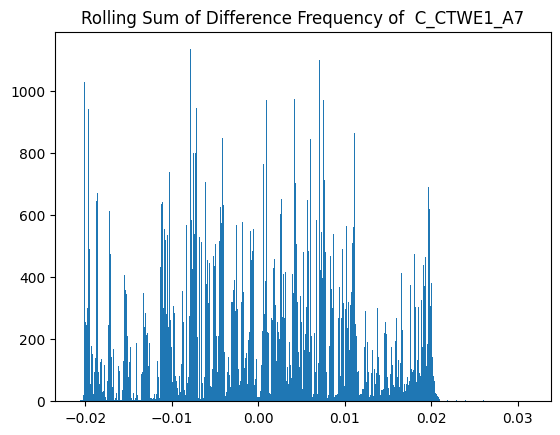

******************************************************************************


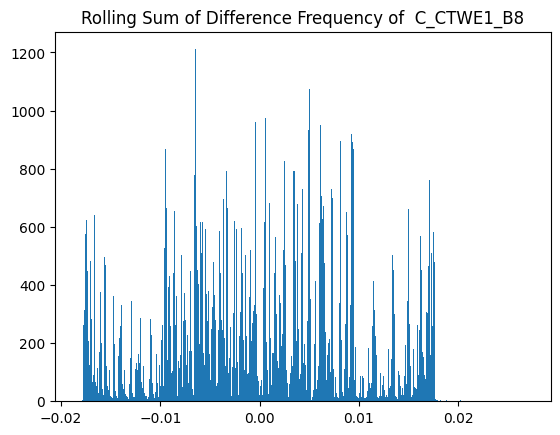

******************************************************************************


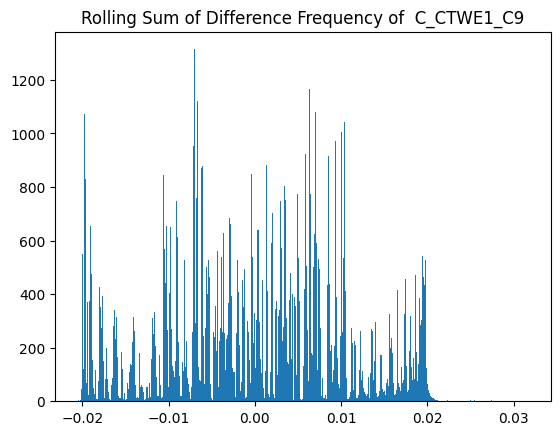

******************************************************************************


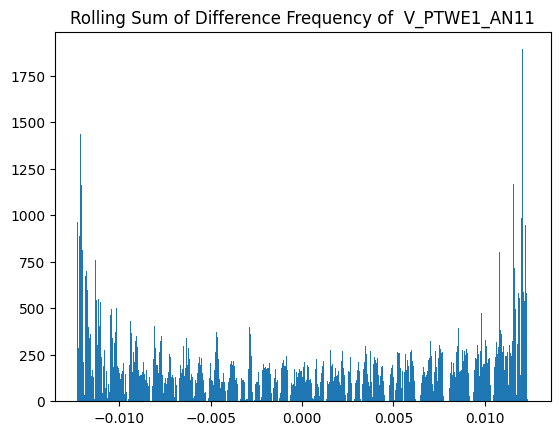

******************************************************************************


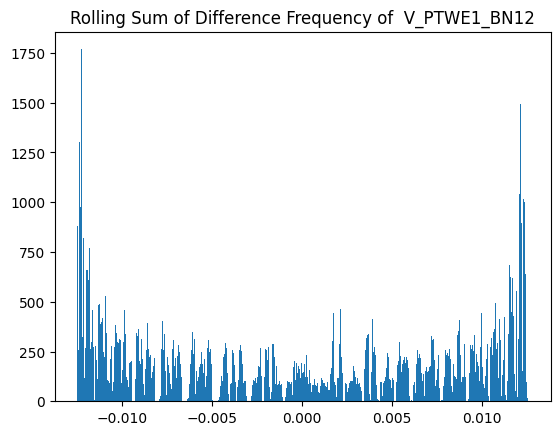

******************************************************************************


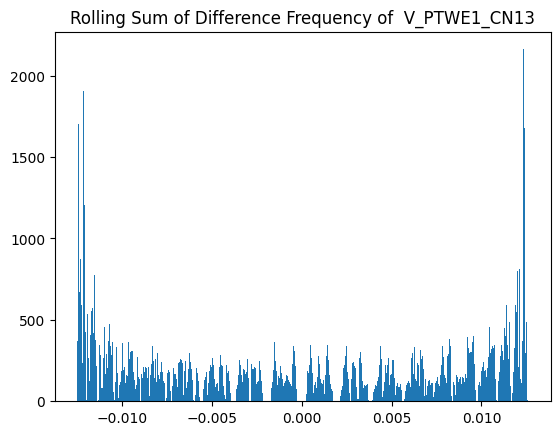

******************************************************************************


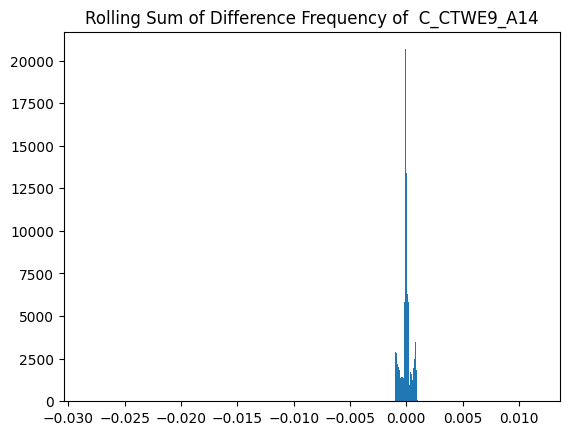

******************************************************************************


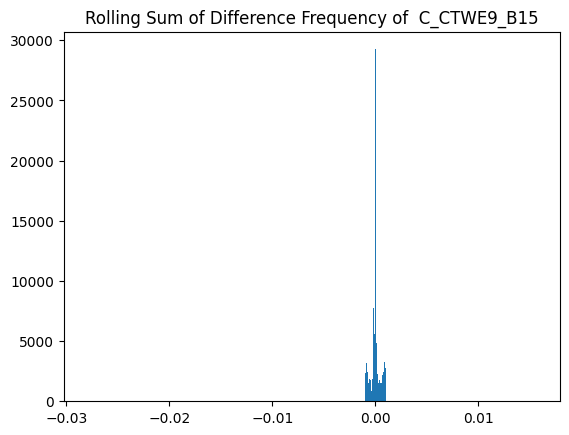

******************************************************************************


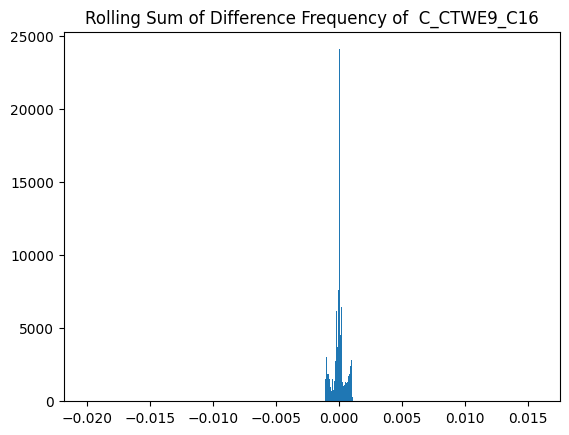

******************************************************************************


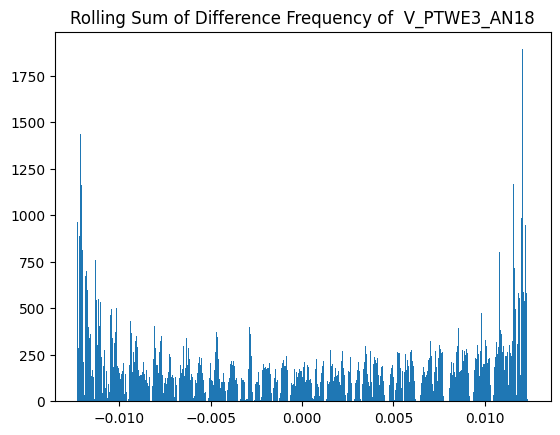

******************************************************************************


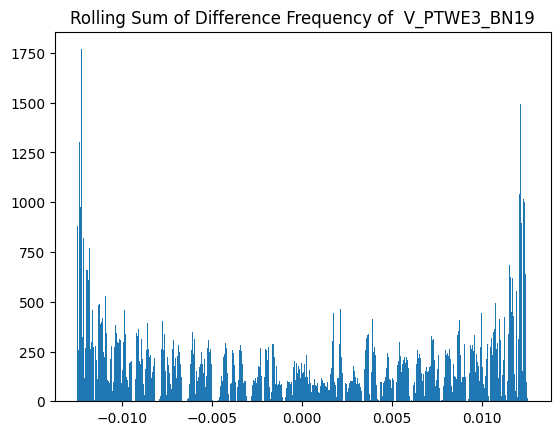

******************************************************************************


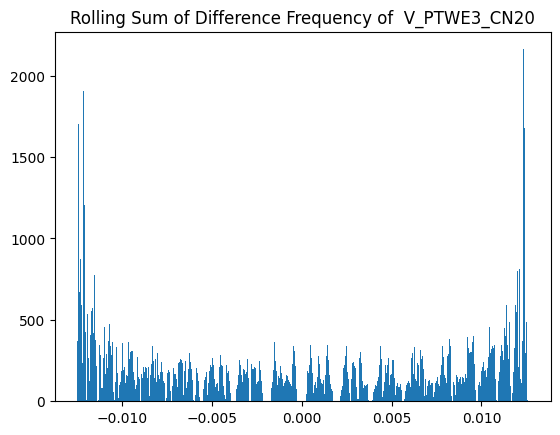

******************************************************************************


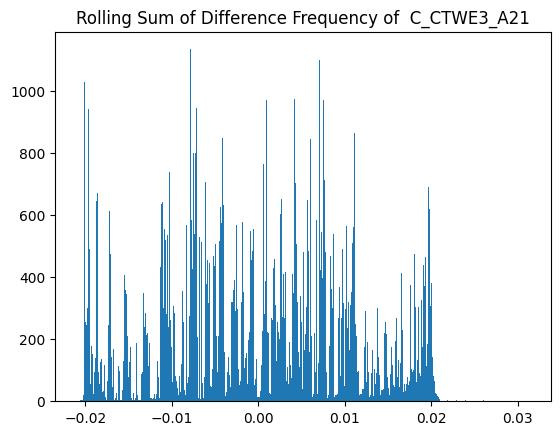

******************************************************************************


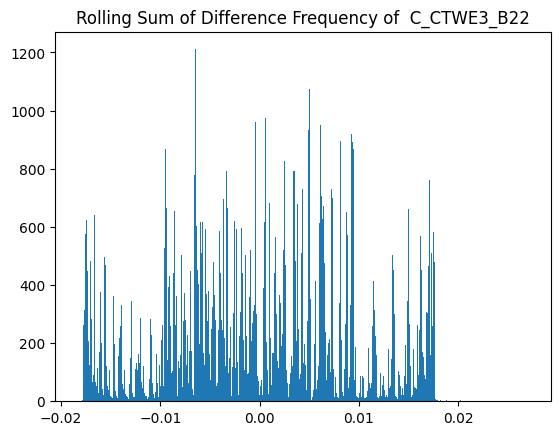

******************************************************************************


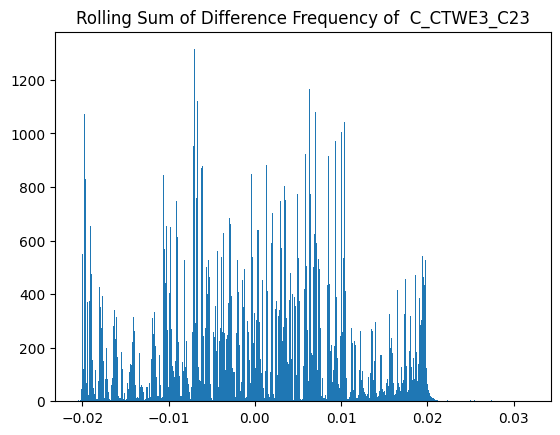

******************************************************************************


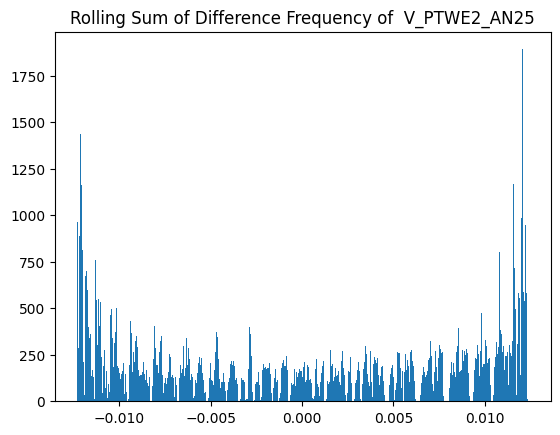

******************************************************************************


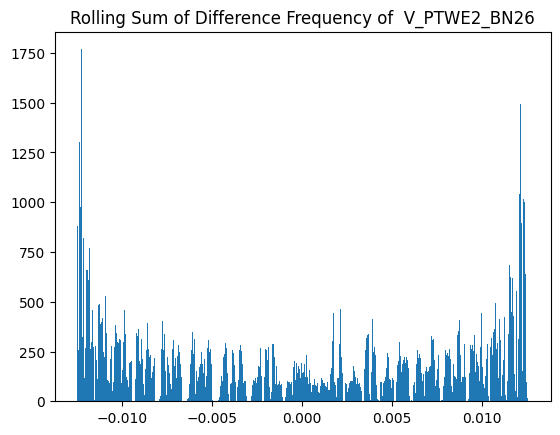

******************************************************************************


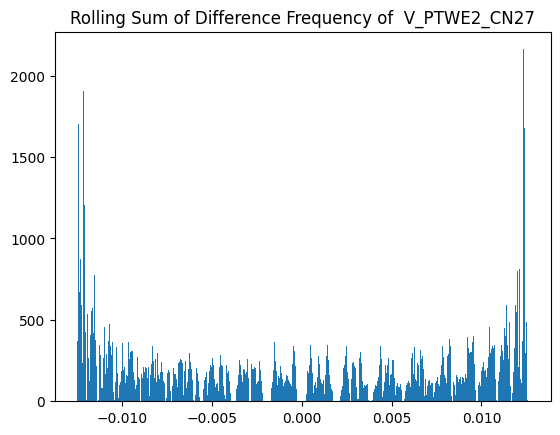

******************************************************************************


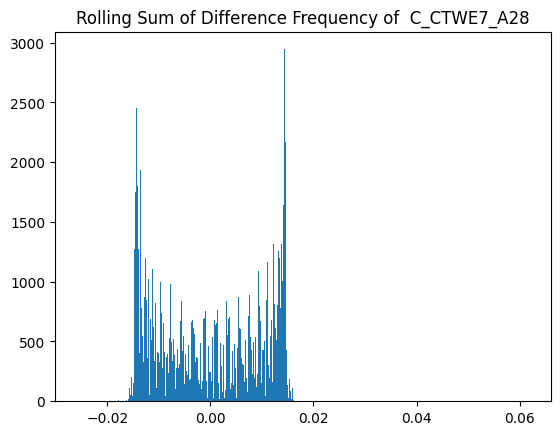

******************************************************************************


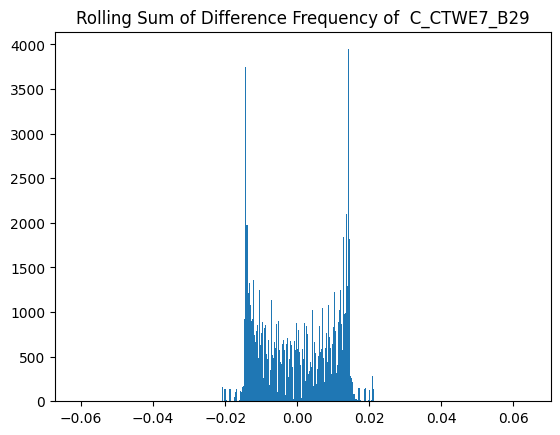

******************************************************************************


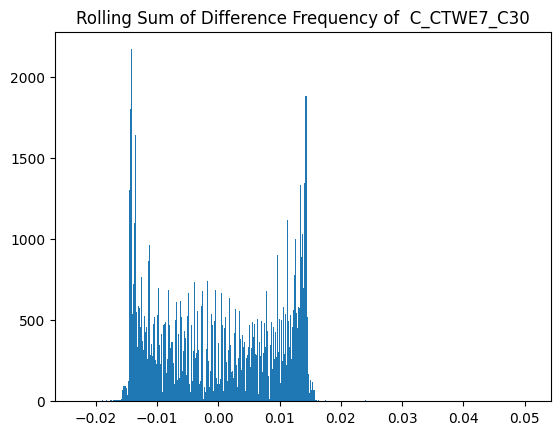

******************************************************************************


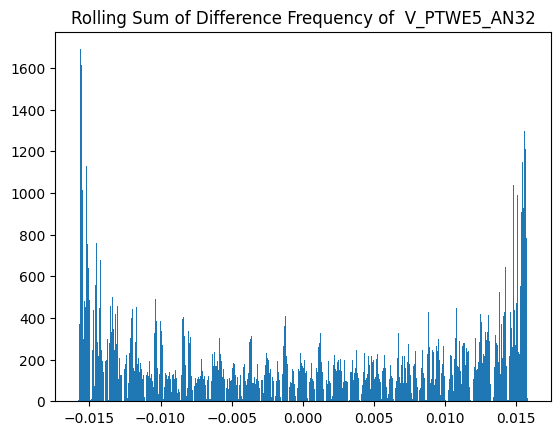

******************************************************************************


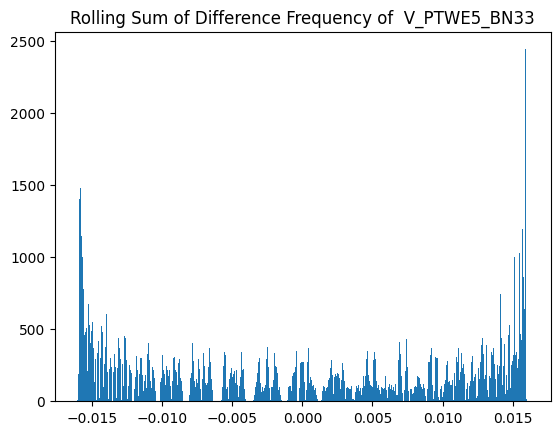

******************************************************************************


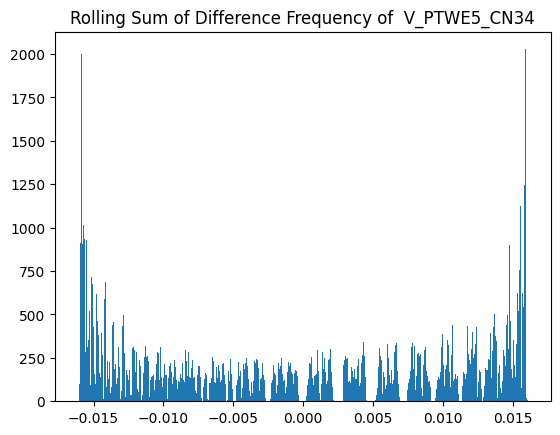

******************************************************************************


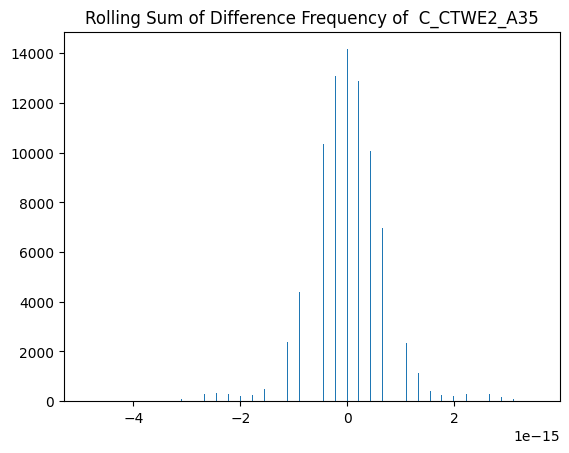

******************************************************************************


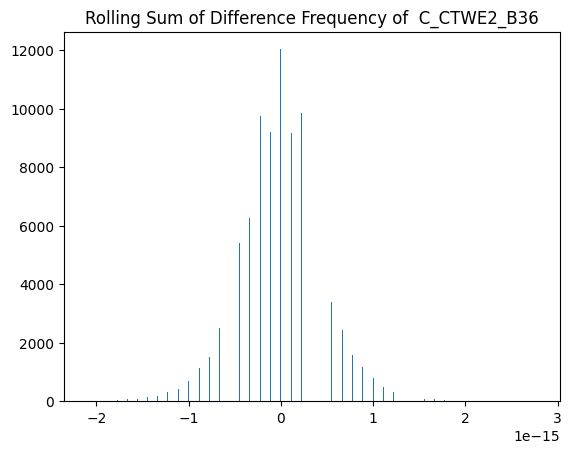

******************************************************************************


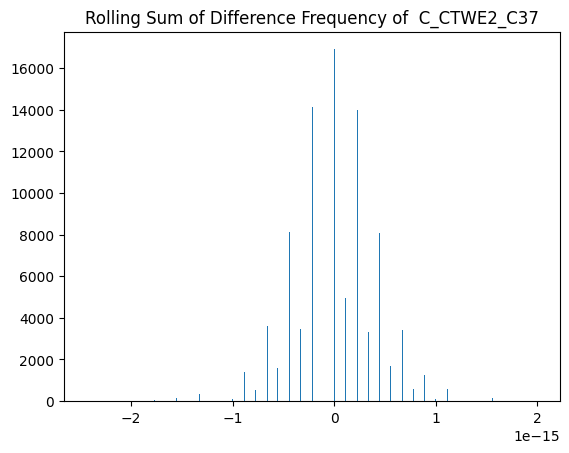

******************************************************************************


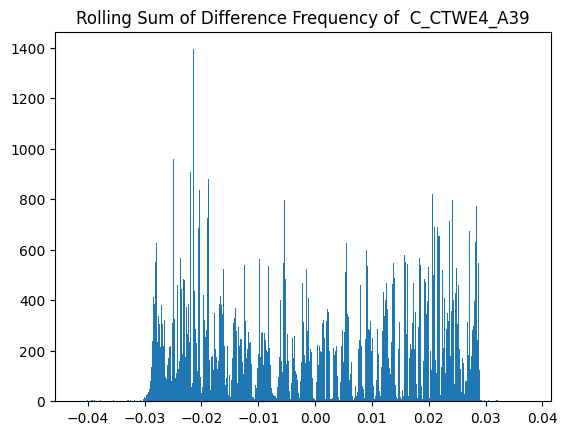

******************************************************************************


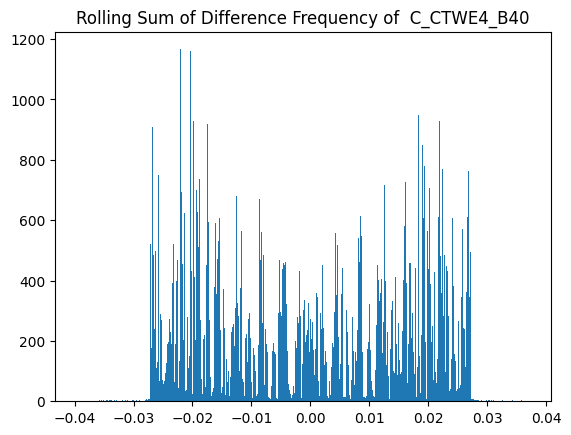

******************************************************************************


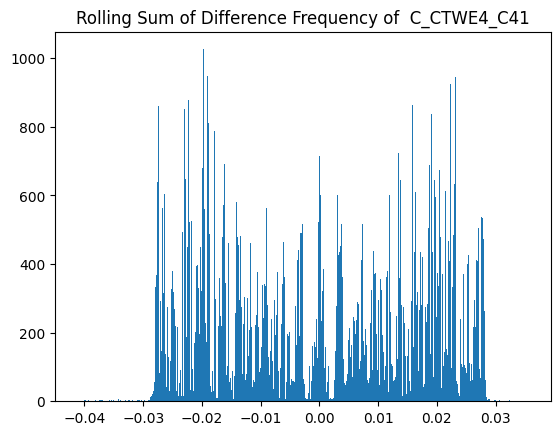

******************************************************************************


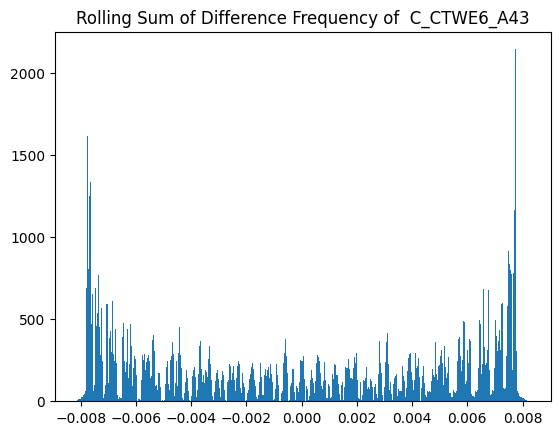

******************************************************************************


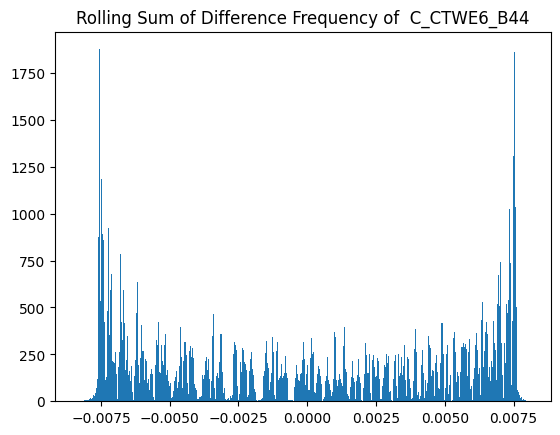

******************************************************************************


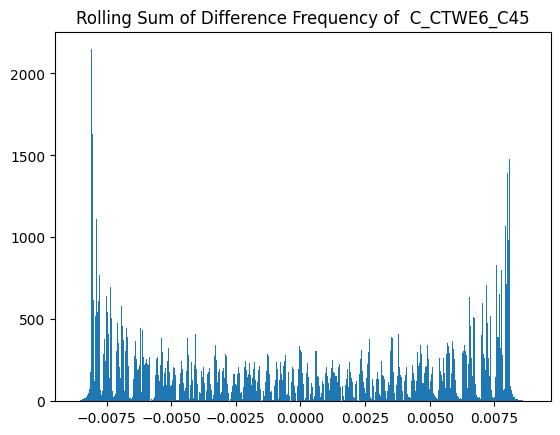

******************************************************************************


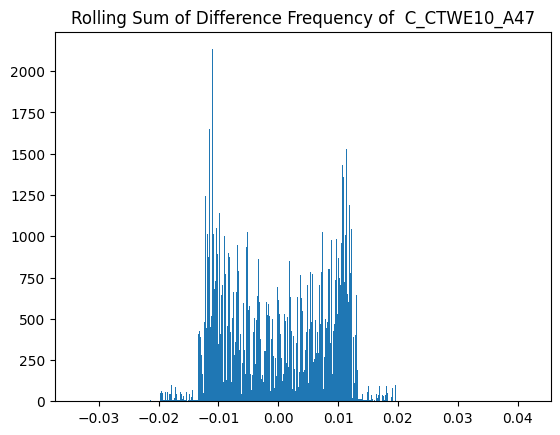

******************************************************************************


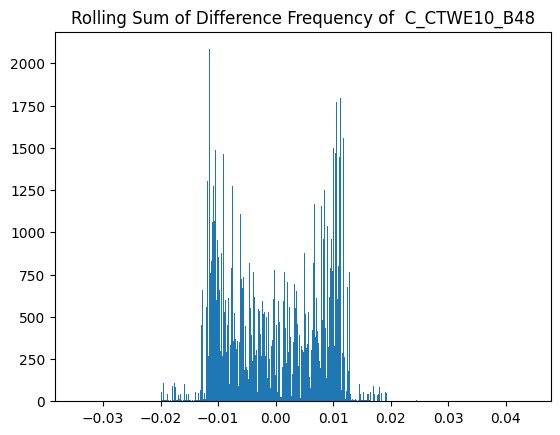

******************************************************************************


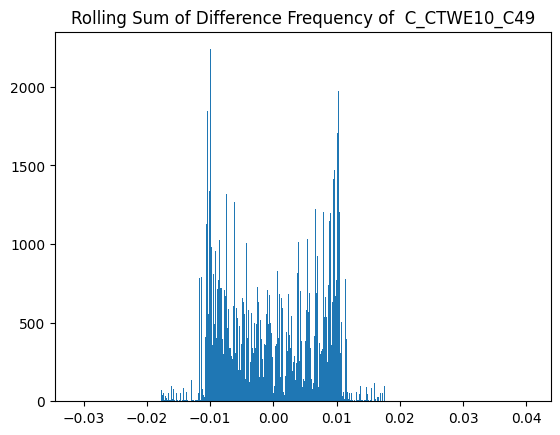

******************************************************************************


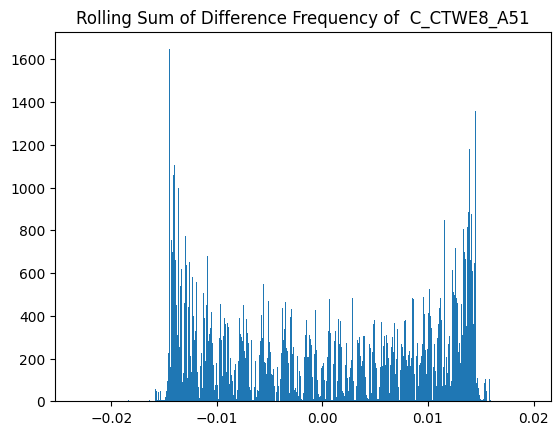

******************************************************************************


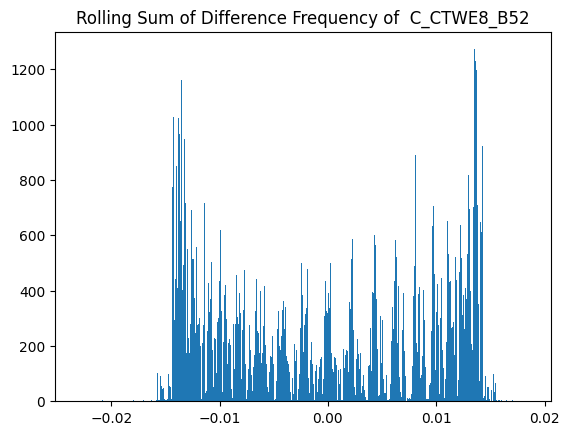

******************************************************************************


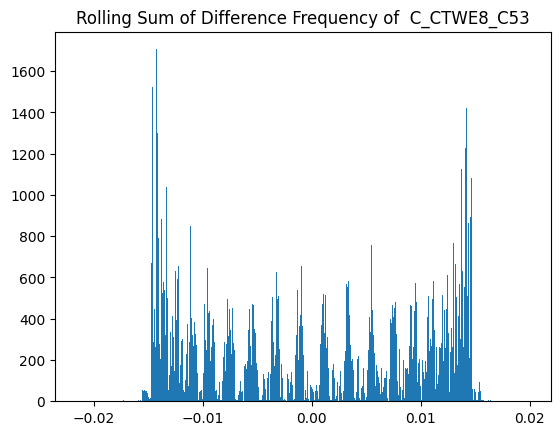

******************************************************************************


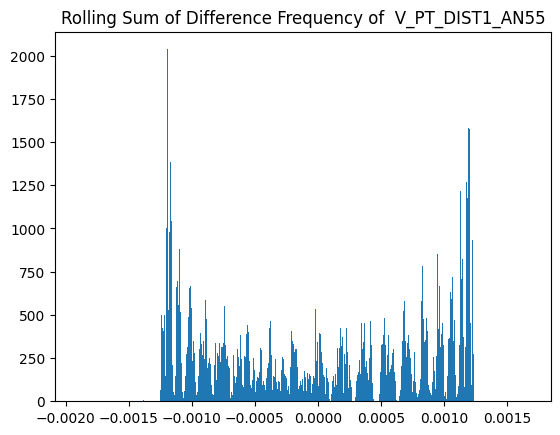

******************************************************************************


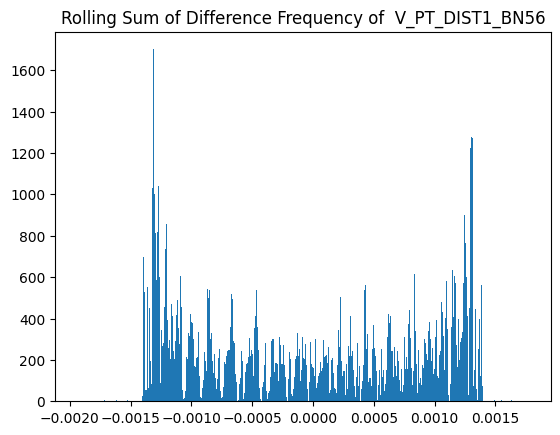

******************************************************************************


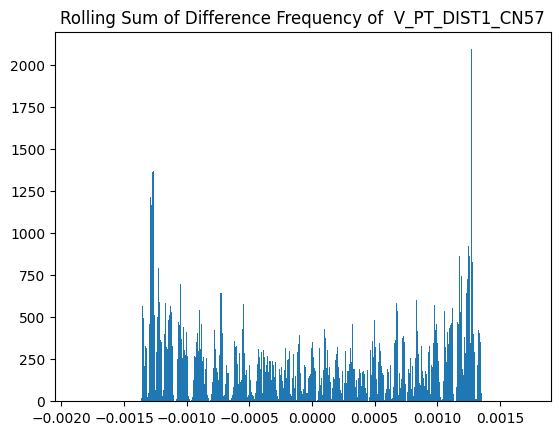

******************************************************************************


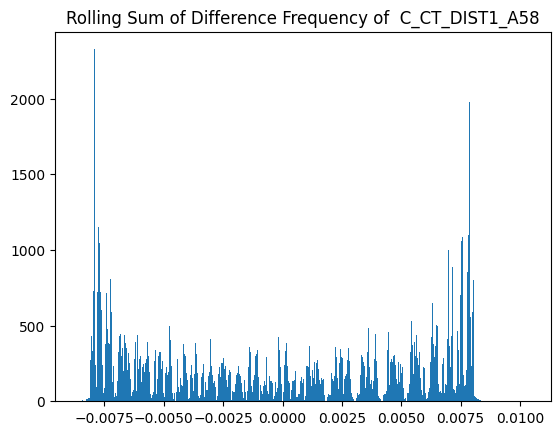

******************************************************************************


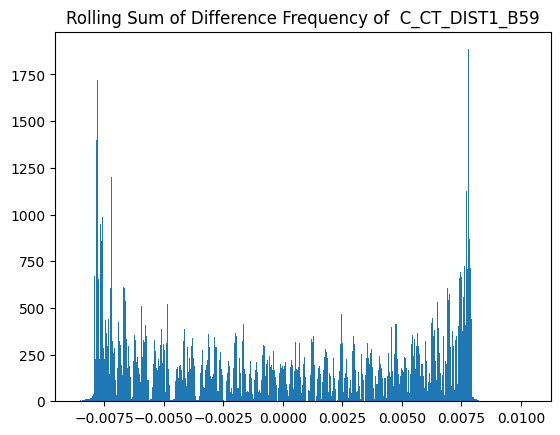

******************************************************************************


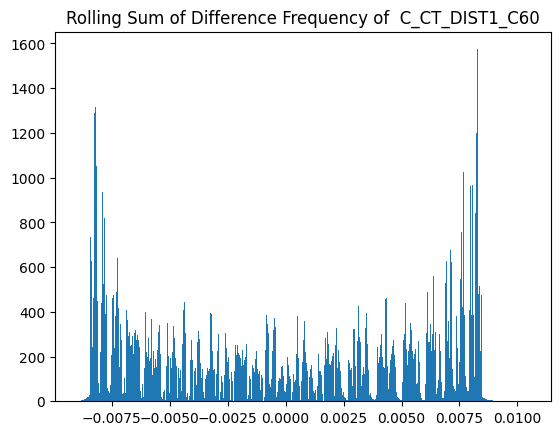

******************************************************************************


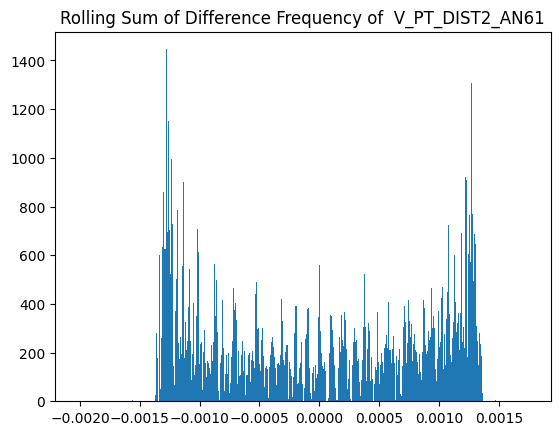

******************************************************************************


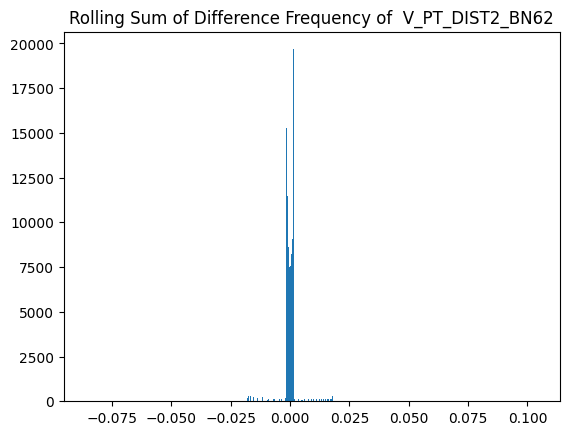

******************************************************************************


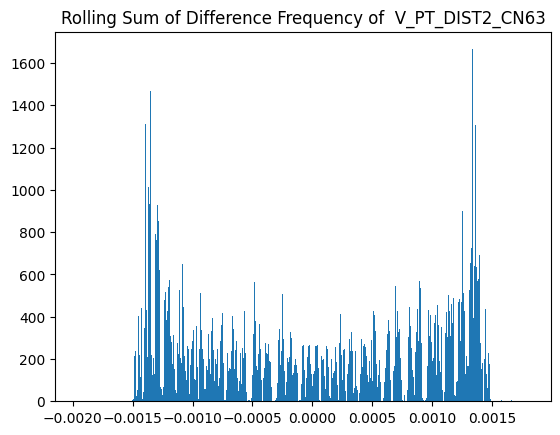

******************************************************************************


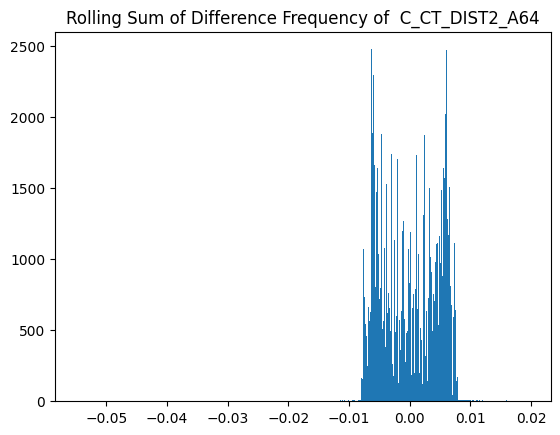

******************************************************************************


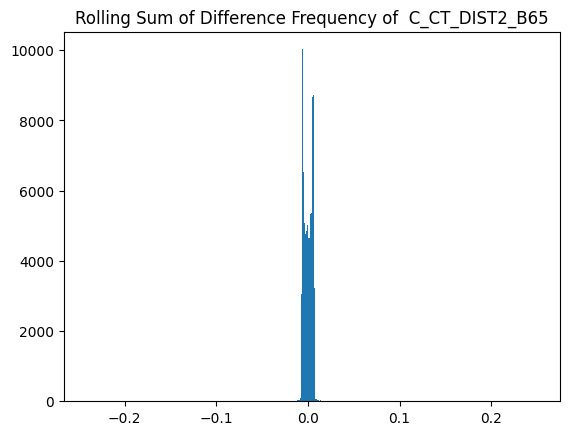

******************************************************************************


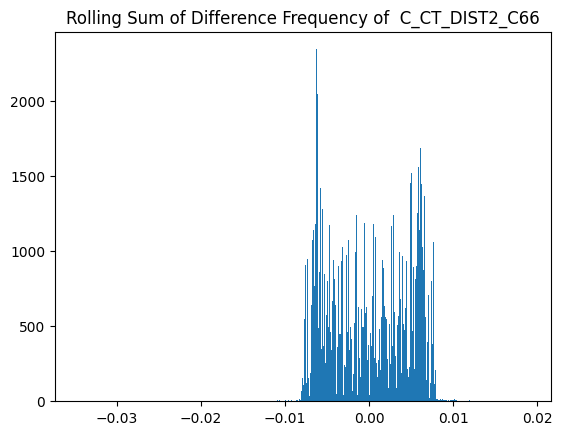

******************************************************************************


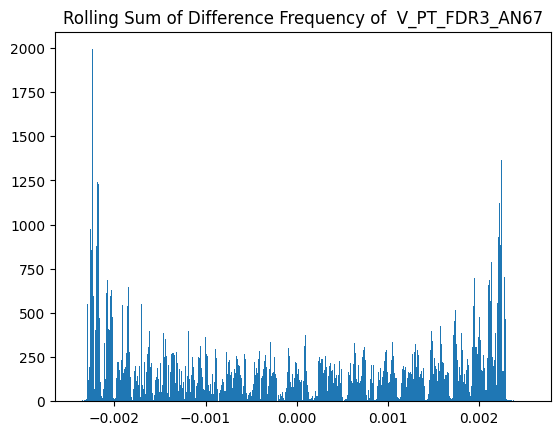

******************************************************************************


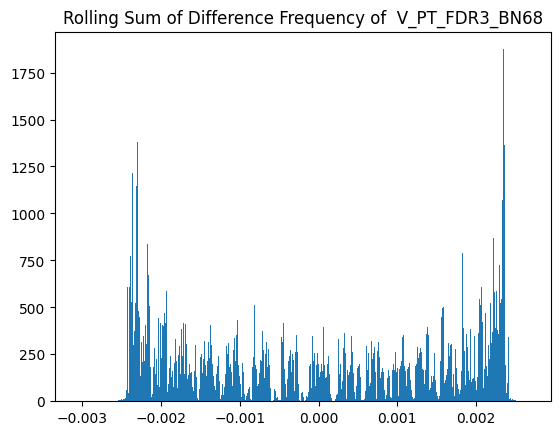

******************************************************************************


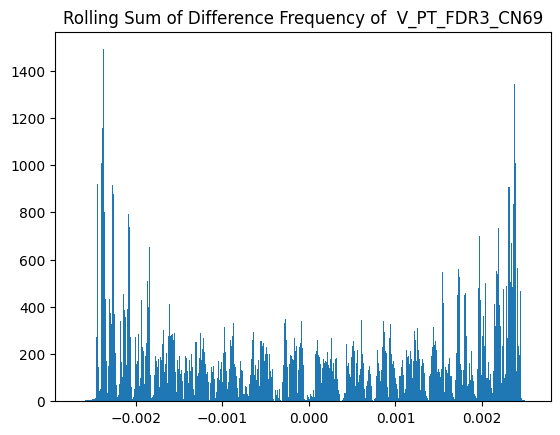

******************************************************************************


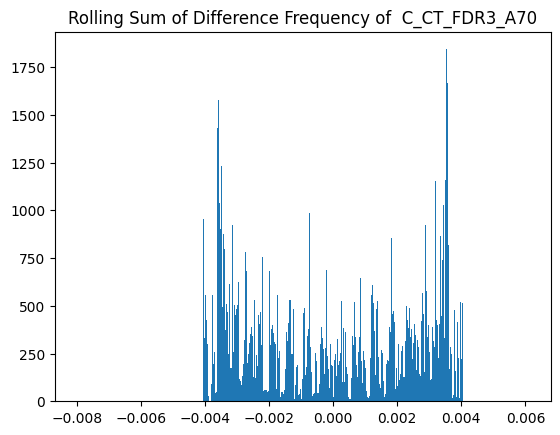

******************************************************************************


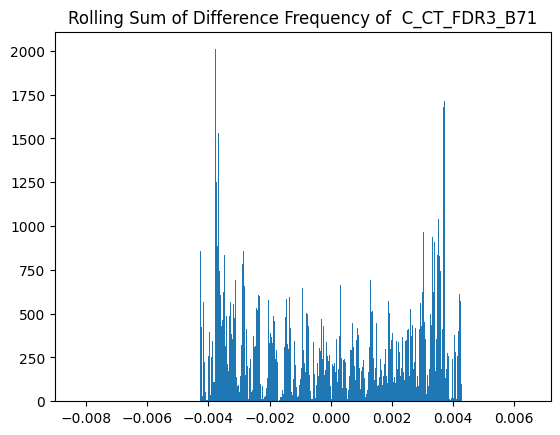

******************************************************************************


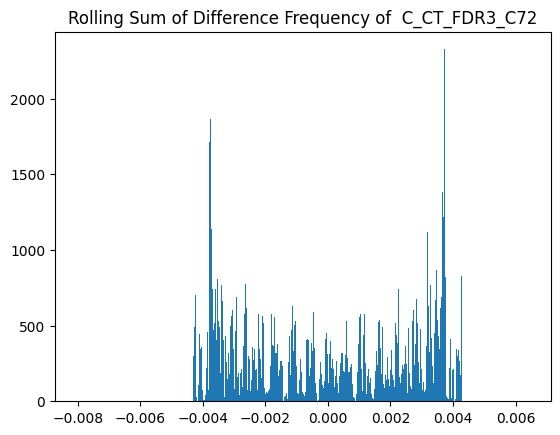

******************************************************************************


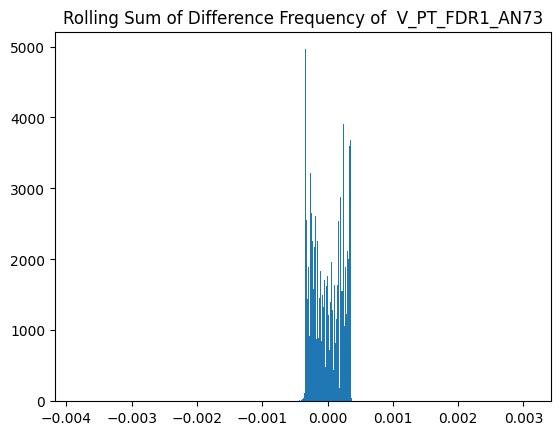

******************************************************************************


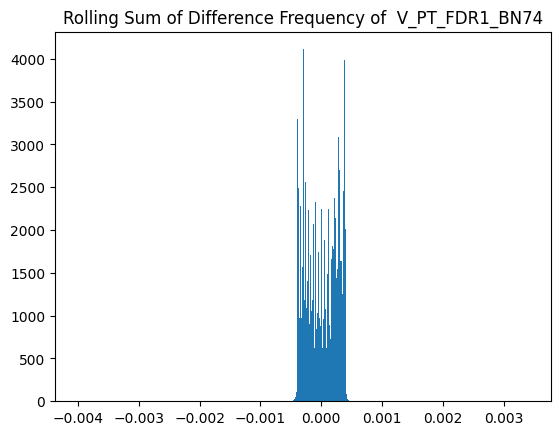

******************************************************************************


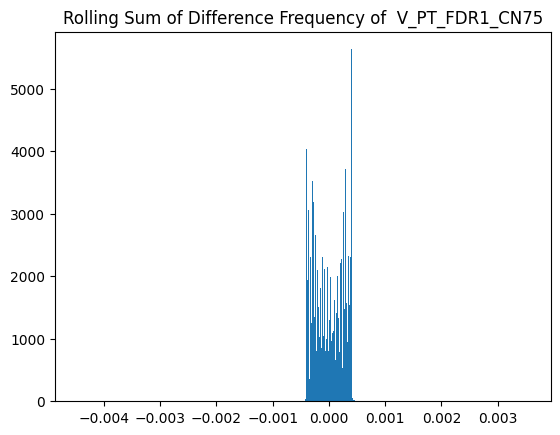

******************************************************************************


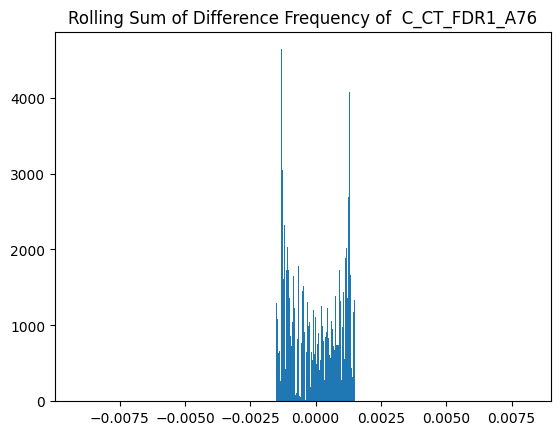

******************************************************************************


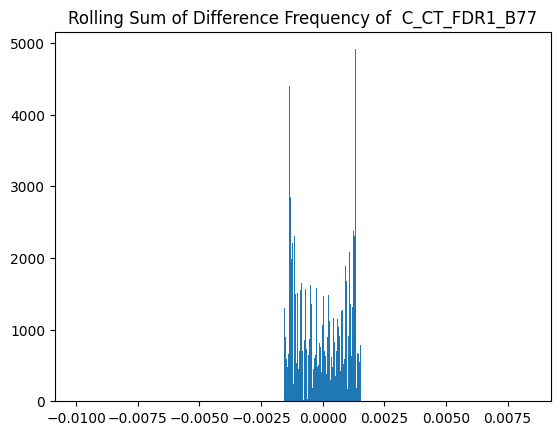

******************************************************************************


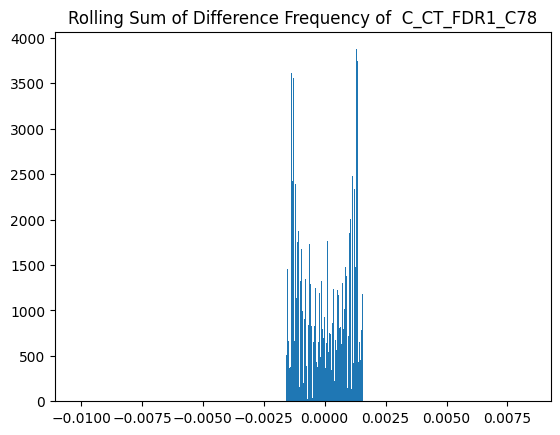

******************************************************************************


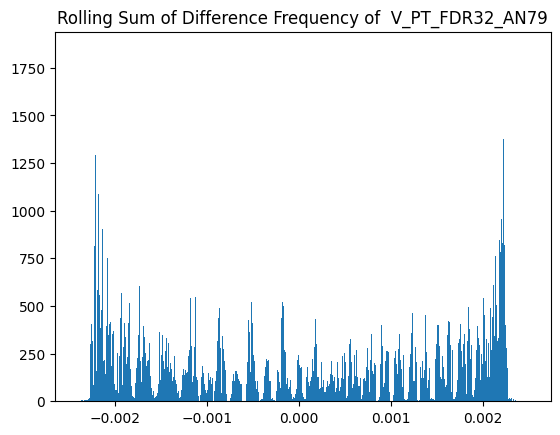

******************************************************************************


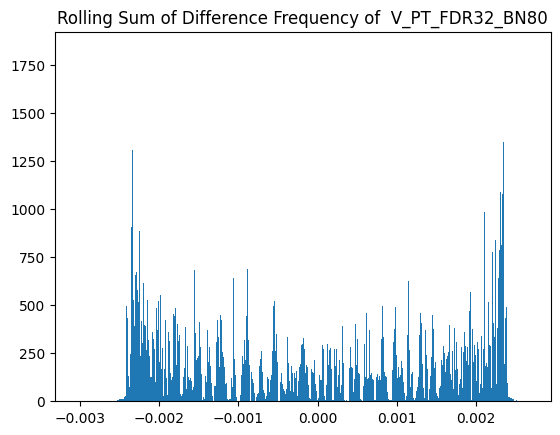

******************************************************************************


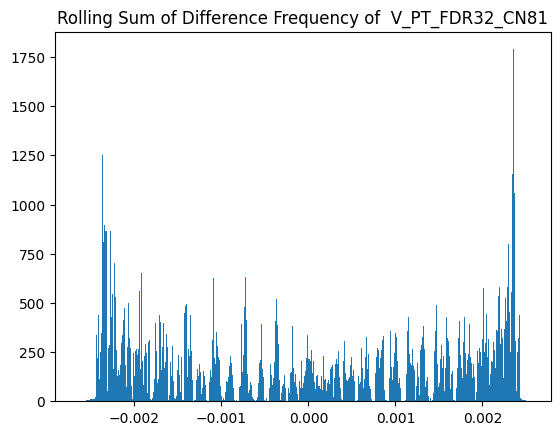

******************************************************************************


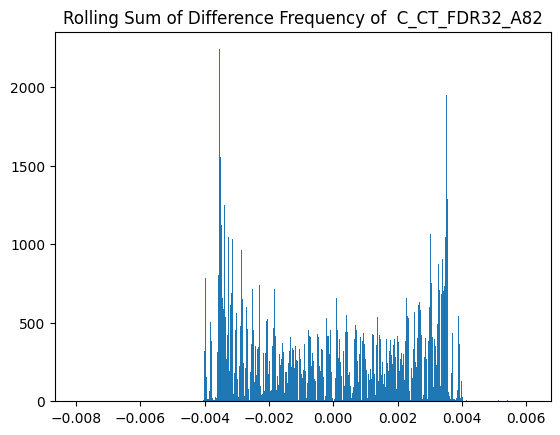

******************************************************************************


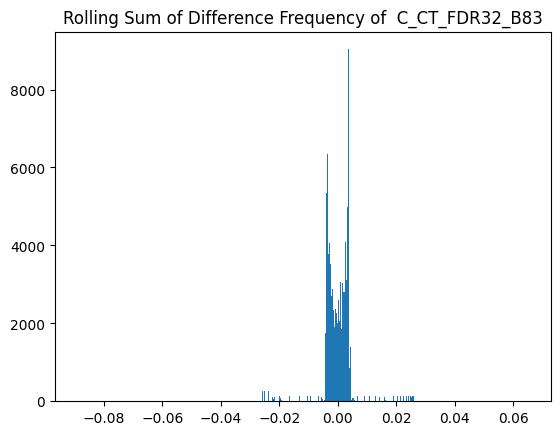

******************************************************************************


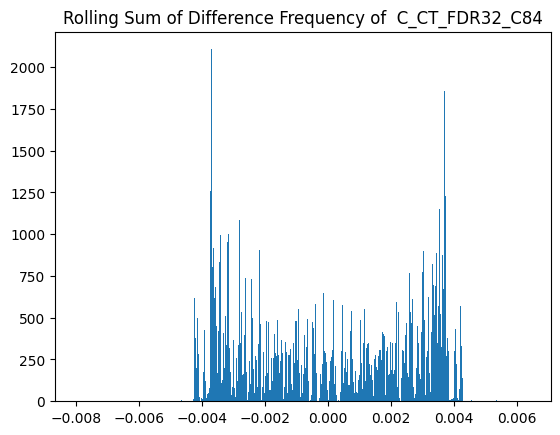

******************************************************************************


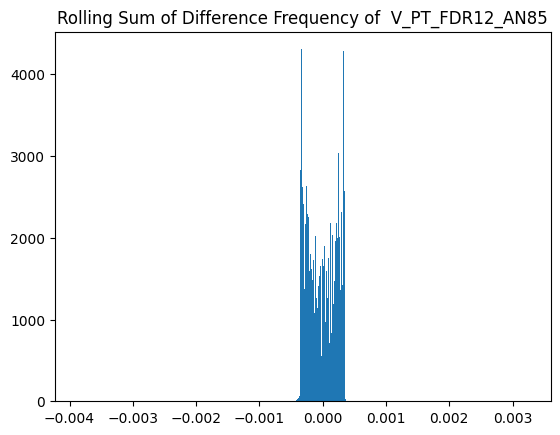

******************************************************************************


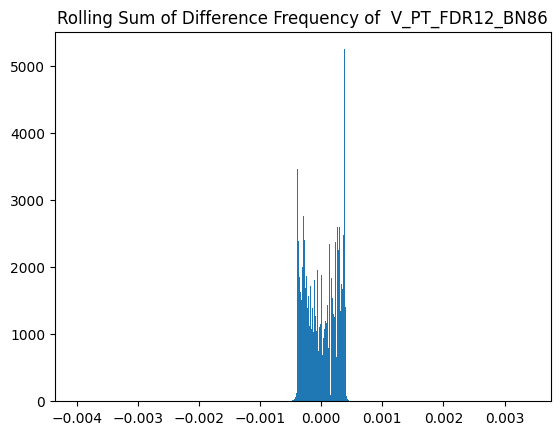

******************************************************************************


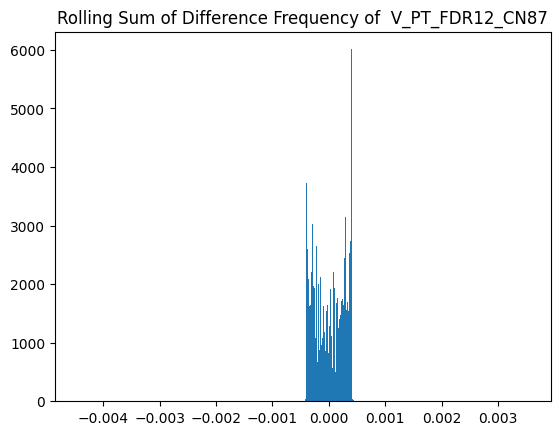

******************************************************************************


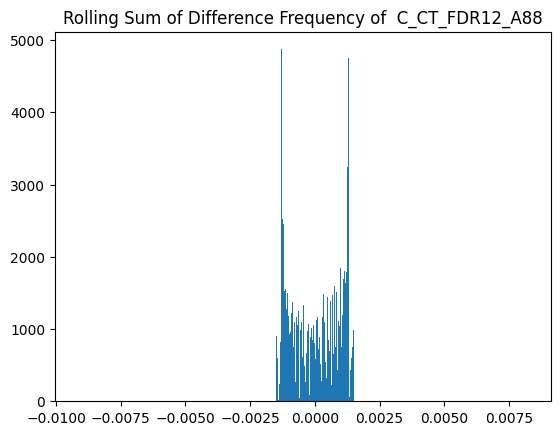

******************************************************************************


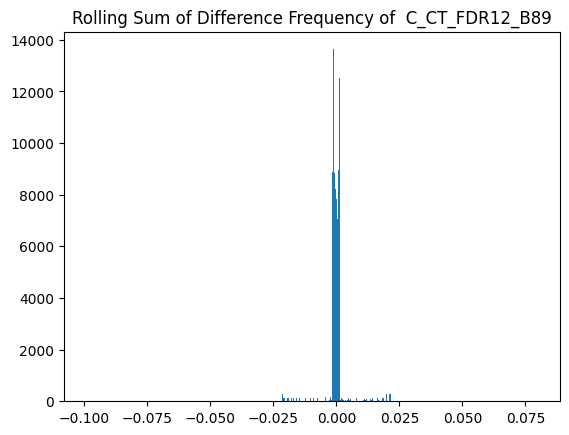

******************************************************************************


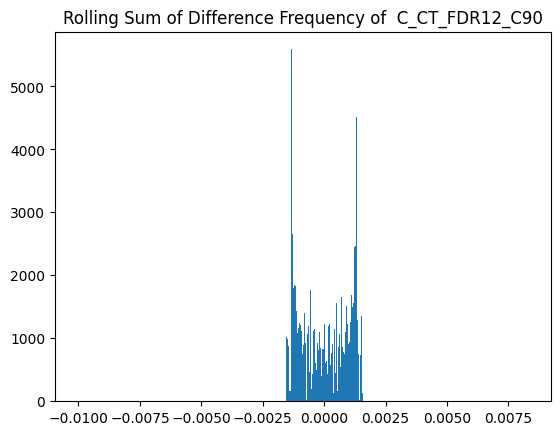

******************************************************************************


In [22]:
# do analysis for multi plot
thresholds = []
thresholds2 = []
cols = data.columns

# correlation window
window = 350

# rolling sum window
w = 10

quant = 0.985

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    
    corr_multi = correlation_multi(data, var1_index, var2_indices, window)
    thresholds.append(
        get_empirical_diff_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=quant,
                                     sensor_names=[var1_index]))
    
    thresholds2.append(get_threshold(stat=corr_multi, window=w, fn=roll_sum, axis=-1, quantile=1-quant))
    print("******************************************************************************")


In [23]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0]-20, attack_indices[-1]-20))
    
all_attack_indices

{(4060, 8859),
 (9820, 13179),
 (22780, 27099),
 (30460, 36219),
 (41980, 47259),
 (49180, 54939),
 (76540, 80379),
 (82300, 86619)}

In [24]:
all_attack_indices.remove((9820, 13179))
    
all_attack_indices

{(4060, 8859),
 (22780, 27099),
 (30460, 36219),
 (41980, 47259),
 (49180, 54939),
 (76540, 80379),
 (82300, 86619)}

In [25]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [26]:
cov_list = []

w = 10

for var1_index, var2_indices in adj_list.items():
    
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = correlation_multi(data_test, var1_index, var2_indices, window=350)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )
    
rsum_list = np.array(cov_list)


  

In [27]:
del attack_dict[56]
del attack_dict[57]
del attack_dict[58]

In [28]:
thresholds

[0.010917221152659386,
 0.01275754555671678,
 0.011092887766298246,
 0.016644645813445384,
 0.0168936220762351,
 0.016809586755152962,
 0.019802195361171,
 0.01734873926930047,
 0.01967475366731991,
 0.012222805434030757,
 0.01244596377037688,
 0.012408940856183456,
 0.0009004283465867324,
 0.0009353442880414634,
 0.001028097875880578,
 0.012222805434030757,
 0.01244596377037688,
 0.01240894085618353,
 0.019802195361171296,
 0.01734873926930032,
 0.019674753667319612,
 0.012222805434030828,
 0.012445963770376546,
 0.012408940856183527,
 0.014603373386116647,
 0.017181991983820106,
 0.0145165033546637,
 0.015639828879478956,
 0.015893892788050656,
 0.015915177496673368,
 1.7763568394002505e-15,
 9.992007221626409e-16,
 8.881784197001252e-16,
 0.02836651663285151,
 0.026829157492398004,
 0.027725144890578278,
 0.007733169418053976,
 0.007554051790651015,
 0.00808658215844624,
 0.013147331338871974,
 0.012847006299345742,
 0.011584352316870107,
 0.014536526912673804,
 0.014296966094125374

In [29]:
things = []
for i in adj_list:
  things+=[i]

***********************************************************************************************
Attacked Sensor: V_PTWE4_AN, Attack Type: Vphase, Time Attacked: 5.0s to 5.9s


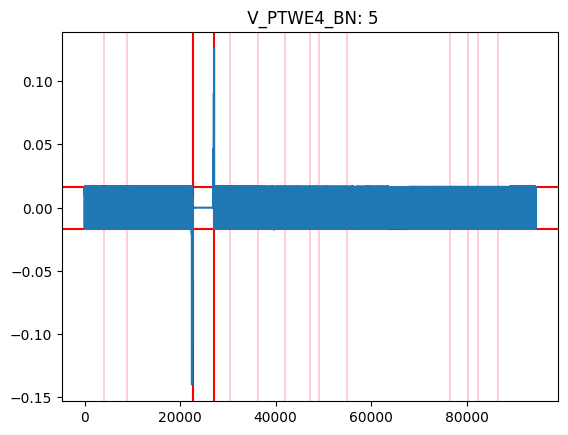

***********************************************************************************************
Attacked Sensor: C_CTWE2_A, Attack Type: GPS, Time Attacked: 10.5s to 11.7s


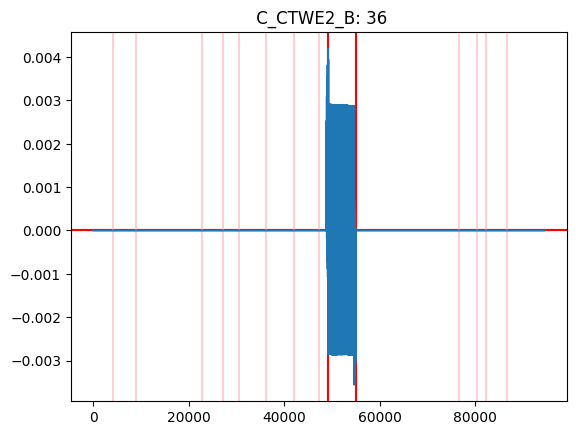

***********************************************************************************************
Attacked Sensor: C_CTWE2_B, Attack Type: GPS, Time Attacked: 10.5s to 11.7s


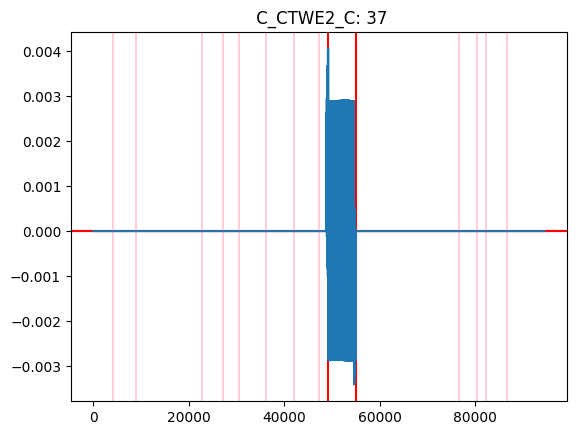

***********************************************************************************************
Attacked Sensor: C_CTWE2_C, Attack Type: GPS, Time Attacked: 10.5s to 11.7s


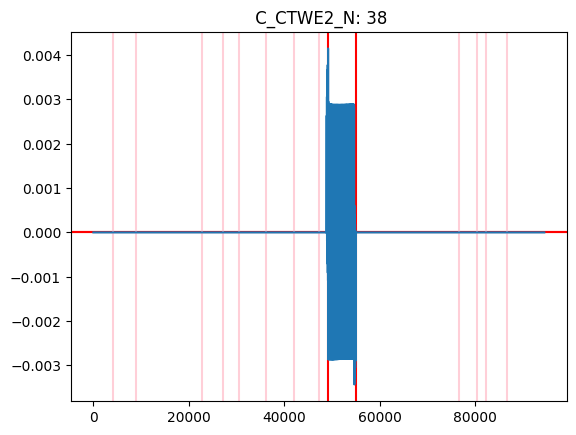

***********************************************************************************************
Attacked Sensor: C_CTWE8_A, Attack Type: CT, Time Attacked: 1.1s to 2.1s


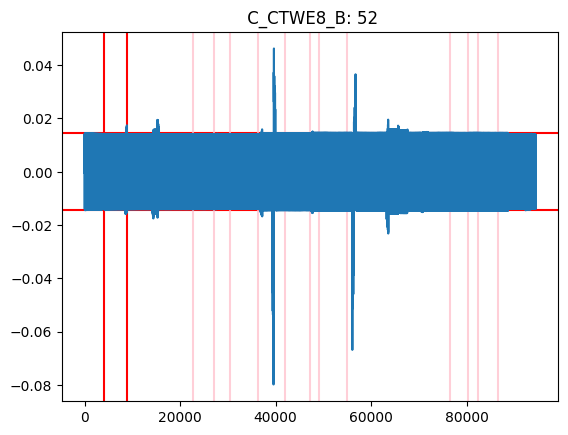

***********************************************************************************************
Attacked Sensor: C_CTWE8_B, Attack Type: CT, Time Attacked: 1.1s to 2.1s


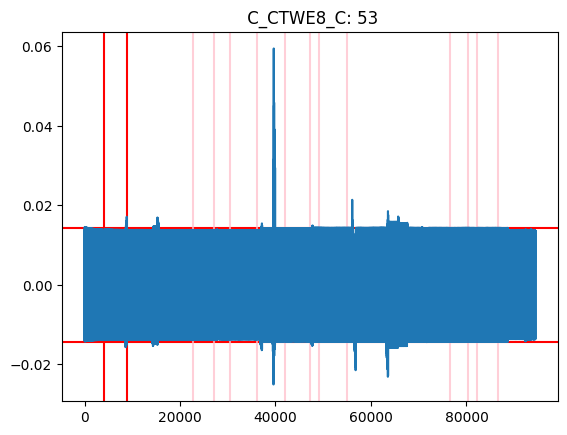

***********************************************************************************************
Attacked Sensor: C_CTWE8_C, Attack Type: CT, Time Attacked: 1.1s to 2.1s


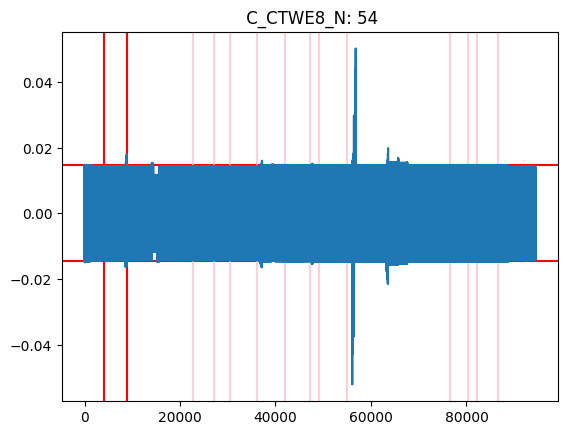

***********************************************************************************************
Attacked Sensor: C_CT_DIST2_B, Attack Type: Cphase, Time Attacked: 6.6s to 7.8s


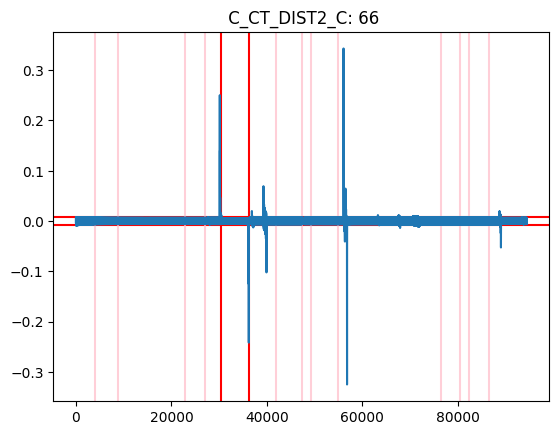

***********************************************************************************************
Attacked Sensor: V_PT_FDR3_AN, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


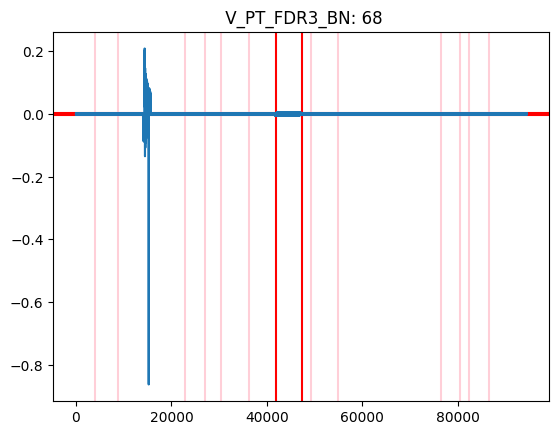

***********************************************************************************************
Attacked Sensor: V_PT_FDR3_BN, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


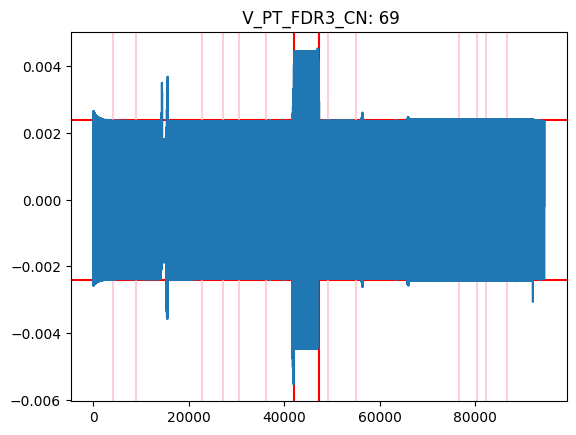

***********************************************************************************************
Attacked Sensor: V_PT_FDR3_CN, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


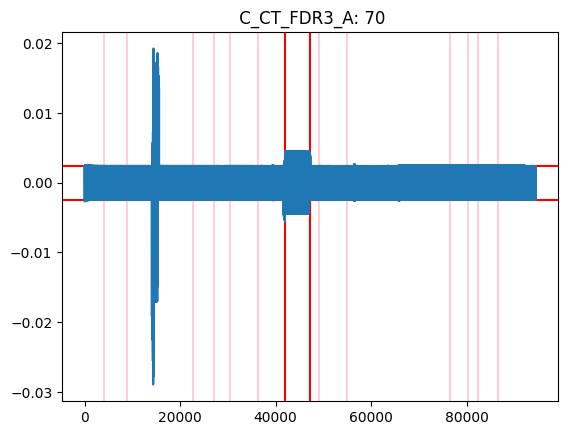

***********************************************************************************************
Attacked Sensor: C_CT_FDR3_A, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


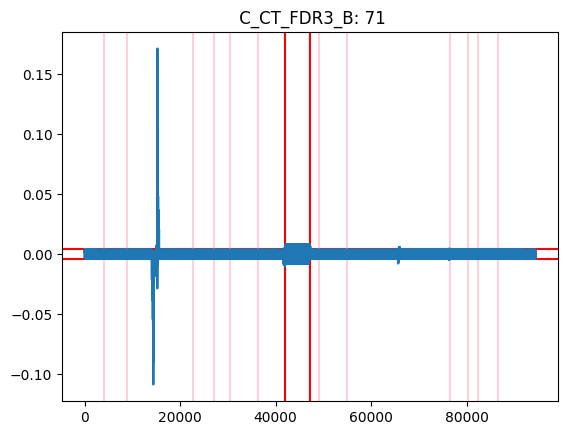

***********************************************************************************************
Attacked Sensor: C_CT_FDR3_B, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


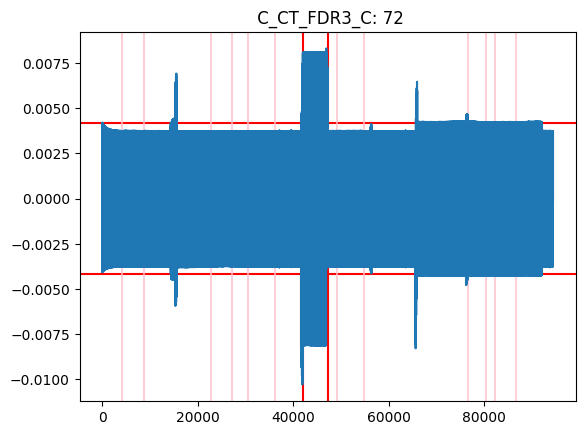

***********************************************************************************************
Attacked Sensor: C_CT_FDR3_C, Attack Type: GPS, Time Attacked: 9.0s to 10.1s


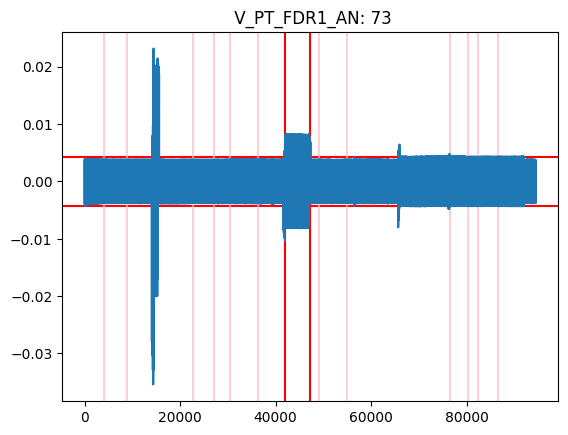

***********************************************************************************************
Attacked Sensor: C_CT_FDR1_A, Attack Type: CT, Time Attacked: 16.2s to 17.0s


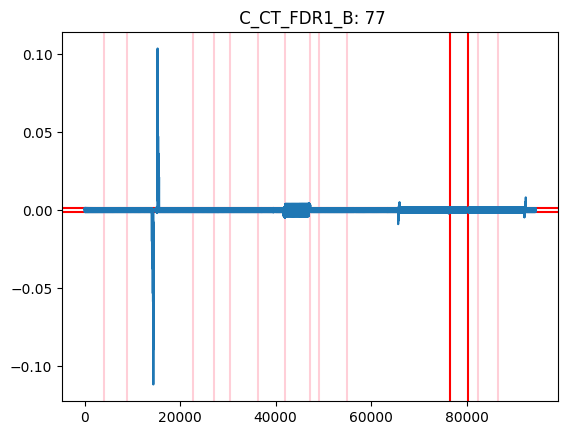

***********************************************************************************************
Attacked Sensor: C_CT_FDR1_B, Attack Type: CT, Time Attacked: 16.2s to 17.0s


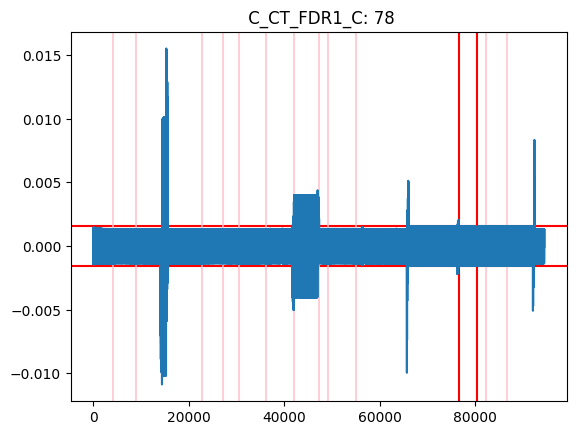

***********************************************************************************************
Attacked Sensor: C_CT_FDR1_C, Attack Type: CT, Time Attacked: 16.2s to 17.0s


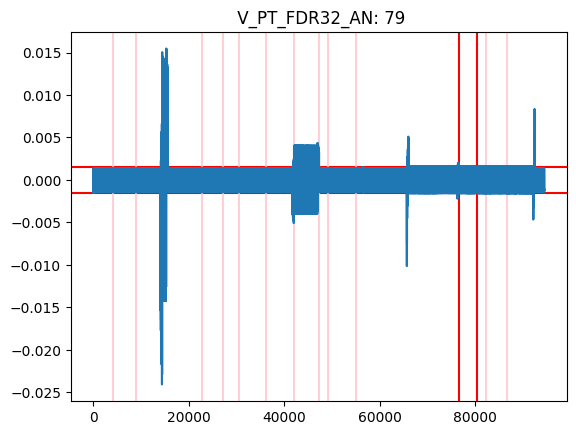

***********************************************************************************************
Attacked Sensor: V_PT_FDR12_AN, Attack Type: PT, Time Attacked: 17.4s to 18.3s


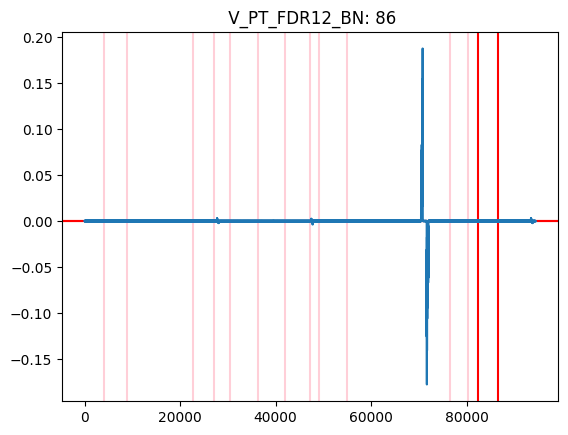

***********************************************************************************************
Attacked Sensor: V_PT_FDR12_BN, Attack Type: PT, Time Attacked: 17.4s to 18.3s


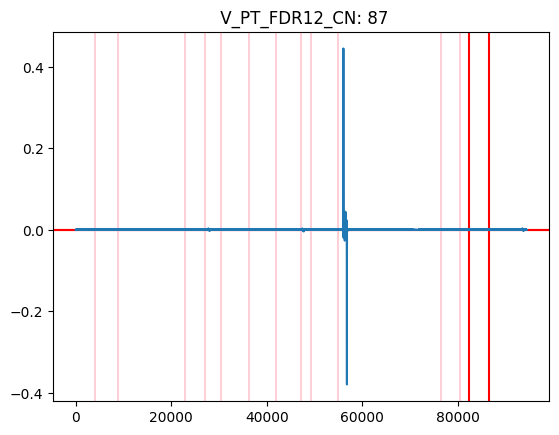

***********************************************************************************************
Attacked Sensor: V_PT_FDR12_CN, Attack Type: PT, Time Attacked: 17.4s to 18.3s


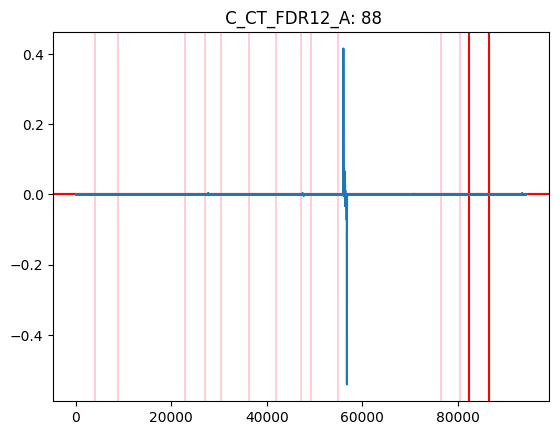

In [30]:
for index, i in enumerate(rsum_list):
  if things[index] in attack_dict:
    print("***********************************************************************************************")
    print(f"Attacked Sensor: {attack_dict[things[index]][-1]}, Attack Type: {attack_dict[things[index]][2]}, Time Attacked: {attack_dict[things[index]][0]}s to {attack_dict[things[index]][1]}s")
    plt.title(f"{cols[things[index]]}: {things[index]}")
    plt.axhline(thresholds[index], color='red')
    plt.axhline(thresholds2[index], color='red')
    attack_indices = df_test.index[(df_test['Time'] >= attack_dict[things[index]][0] * 1e6) & (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201
    for start, end in all_attack_indices:
      if attack_indices[0]-20 == start:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')
      else:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)
    plt.plot(i)
    plt.show()

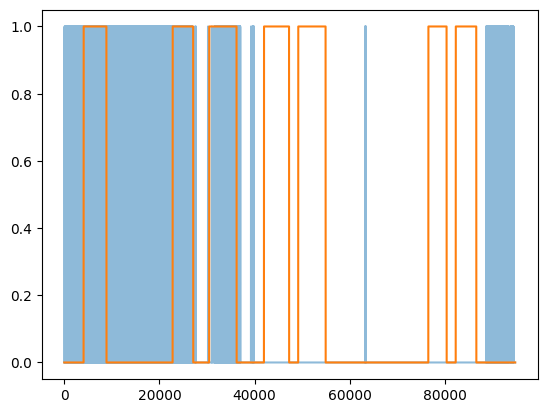

 C_CTWE5_A :1 has accuracy = 0.6328569168292811, precision = 0.2674271229404309, recall = 0.012385173010888387, and f1 = 0.02367395023982497


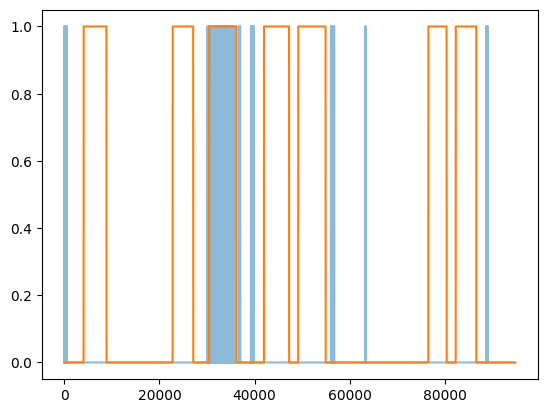

 C_CTWE5_B :2 has accuracy = 0.6433415959073888, precision = 0.5713501646542262, recall = 0.03055205001027206, and f1 = 0.05800250731299624


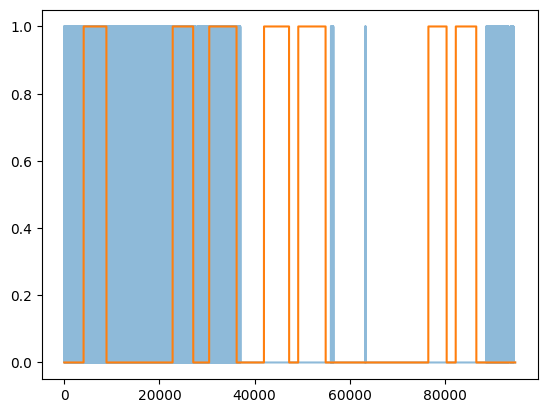

 C_CTWE5_C :3 has accuracy = 0.6321185591477243, precision = 0.2575392038600724, recall = 0.012531916766941566, and f1 = 0.02390081441885198


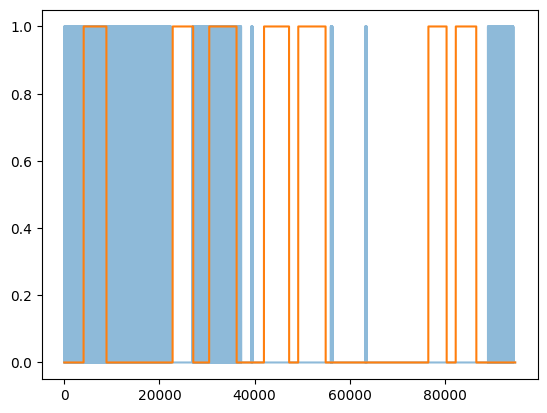

 V_PTWE4_AN :5 has accuracy = 0.6350930858077105, precision = 0.32123287671232875, recall = 0.013764564317788278, and f1 = 0.02639799622885768


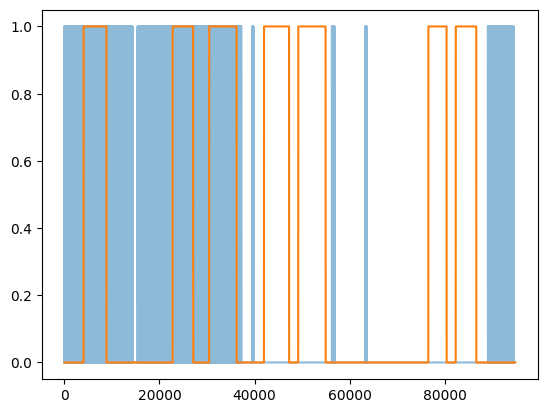

 V_PTWE4_BN :6 has accuracy = 0.6368651442434471, precision = 0.3767409470752089, recall = 0.015877674404954068, and f1 = 0.0304711481596215


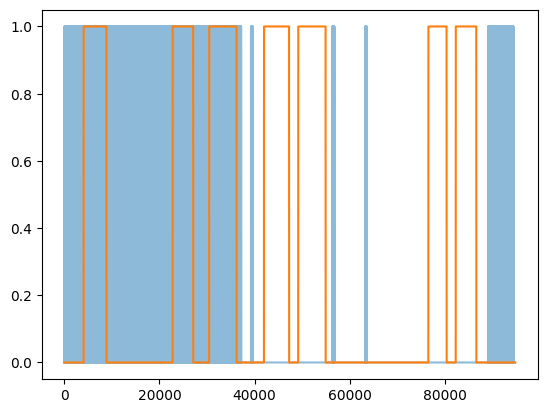

 V_PTWE4_CN :7 has accuracy = 0.6347133590000528, precision = 0.316688567674113, recall = 0.014146098083526546, and f1 = 0.02708245540103947


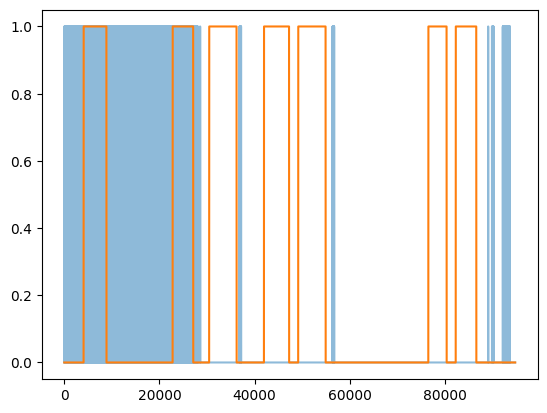

 C_CTWE1_A :8 has accuracy = 0.6312641738304942, precision = 0.23455308938212358, recall = 0.011475361723358671, and f1 = 0.021880246222719644


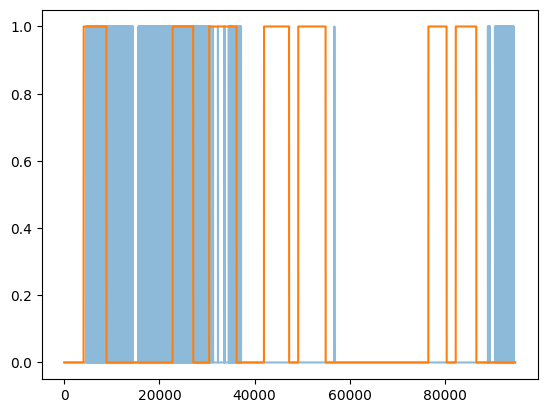

 C_CTWE1_B :9 has accuracy = 0.6352934971784189, precision = 0.3152094048493755, recall = 0.01259061426936284, and f1 = 0.024214031720945984


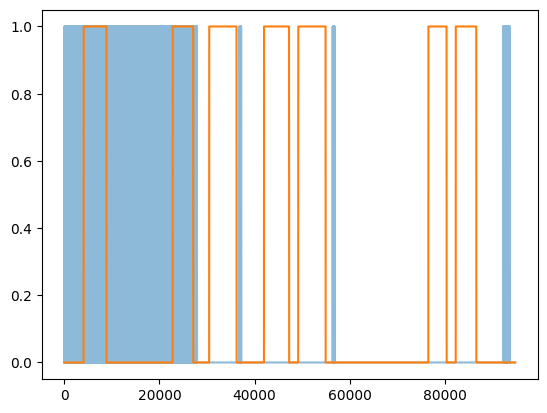

 C_CTWE1_C :10 has accuracy = 0.6322662306840356, precision = 0.23560910307898258, recall = 0.010330760426143868, and f1 = 0.019793628925689546


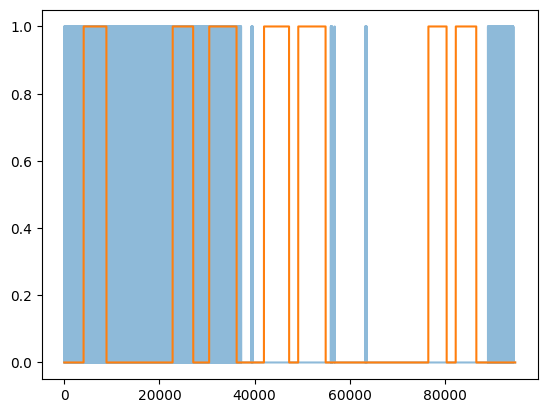

 V_PTWE1_AN :12 has accuracy = 0.6511998312325299, precision = 0.6653504442250741, recall = 0.05934317494790597, and f1 = 0.10896744988143997


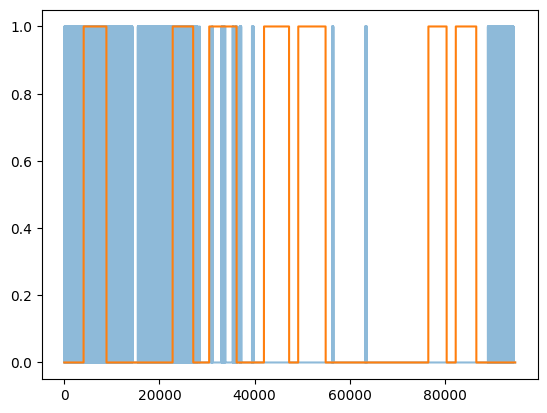

 V_PTWE1_BN :13 has accuracy = 0.6344285638943093, precision = 0.2888086642599278, recall = 0.011739500484254395, and f1 = 0.02256190422471657


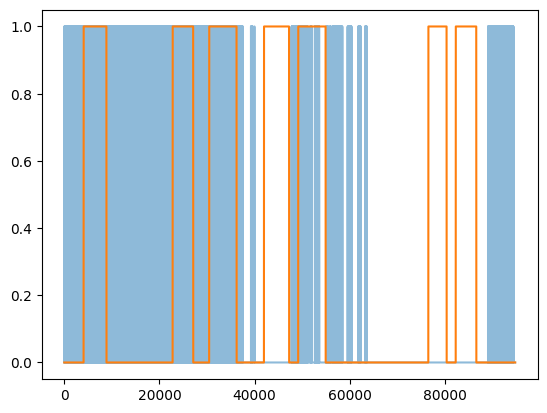

 V_PTWE1_CN :14 has accuracy = 0.6335108907758029, precision = 0.2848911651728553, recall = 0.013060194288733014, and f1 = 0.02497544548898555


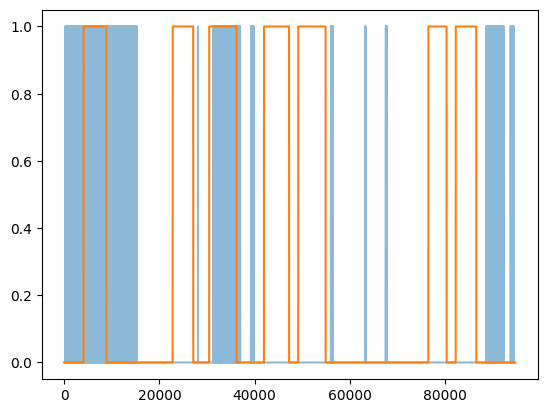

 C_CTWE9_A :15 has accuracy = 0.6242603238225832, precision = 0.1744430432955023, recall = 0.012179731752413934, and f1 = 0.022769669702622626


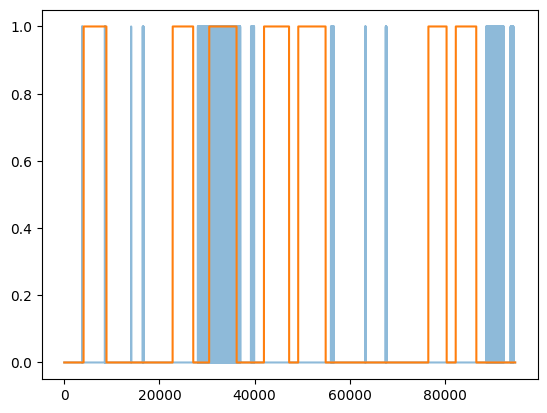

 C_CTWE9_B :16 has accuracy = 0.6284478666736987, precision = 0.21428571428571427, recall = 0.012678660522994746, and f1 = 0.02394081299010779


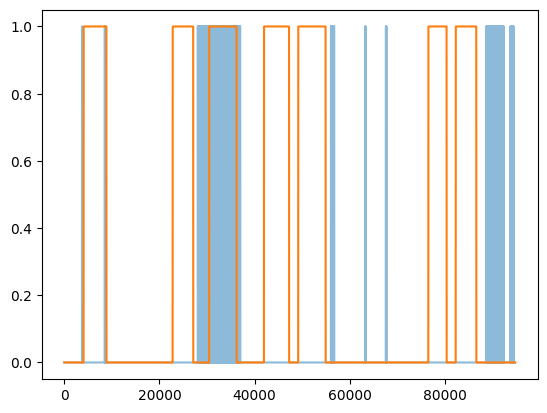

 C_CTWE9_C :17 has accuracy = 0.6312114339960972, precision = 0.25332594235033257, recall = 0.013412379303260646, and f1 = 0.025475931655378092


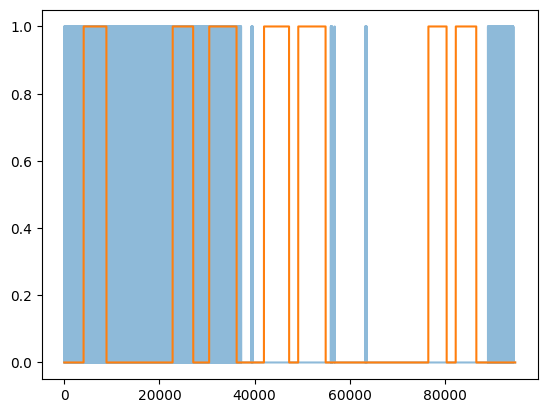

 V_PTWE3_AN :19 has accuracy = 0.6511998312325299, precision = 0.6653504442250741, recall = 0.05934317494790597, and f1 = 0.10896744988143997


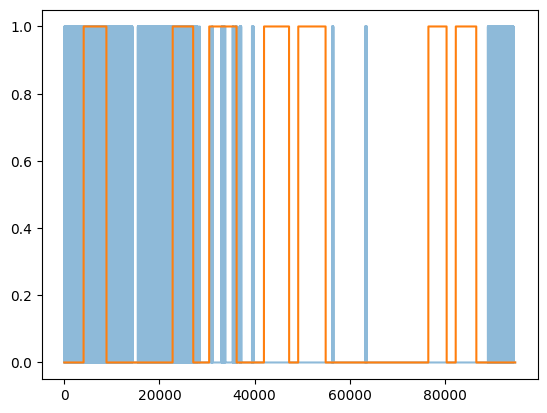

 V_PTWE3_BN :20 has accuracy = 0.6344285638943093, precision = 0.2888086642599278, recall = 0.011739500484254395, and f1 = 0.02256190422471657


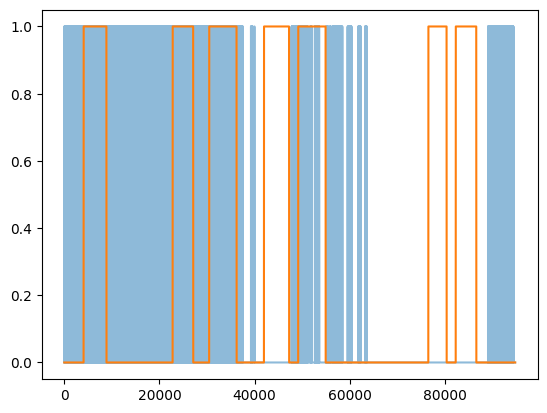

 V_PTWE3_CN :21 has accuracy = 0.6335108907758029, precision = 0.2848911651728553, recall = 0.013060194288733014, and f1 = 0.02497544548898555


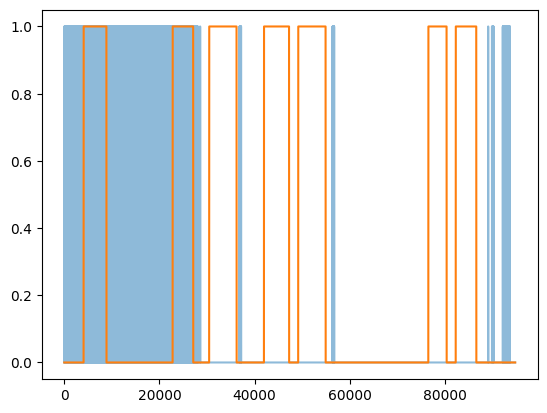

 C_CTWE3_A :22 has accuracy = 0.6312641738304942, precision = 0.23455308938212358, recall = 0.011475361723358671, and f1 = 0.021880246222719644


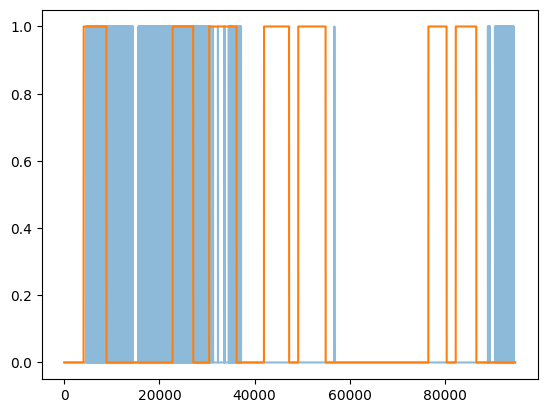

 C_CTWE3_B :23 has accuracy = 0.6352934971784189, precision = 0.3152094048493755, recall = 0.01259061426936284, and f1 = 0.024214031720945984


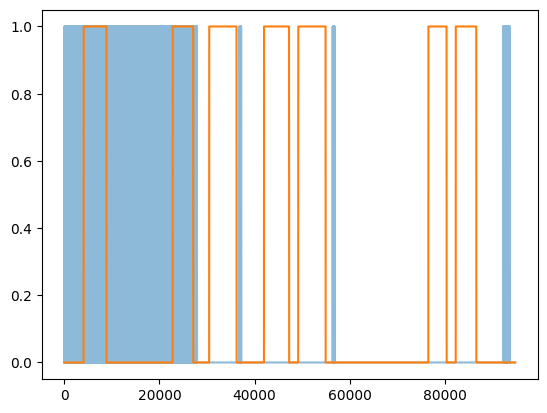

 C_CTWE3_C :24 has accuracy = 0.6322662306840356, precision = 0.23560910307898258, recall = 0.010330760426143868, and f1 = 0.019793628925689546


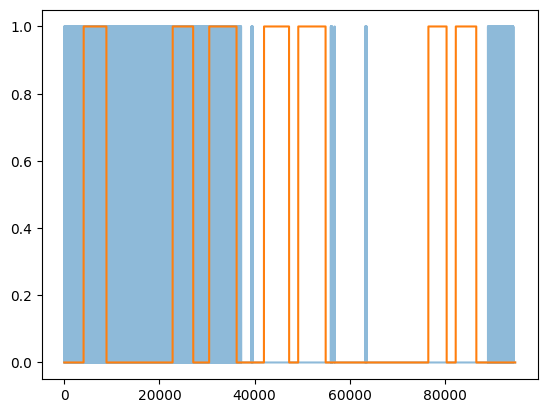

 V_PTWE2_AN :26 has accuracy = 0.6511998312325299, precision = 0.6653504442250741, recall = 0.05934317494790597, and f1 = 0.10896744988143997


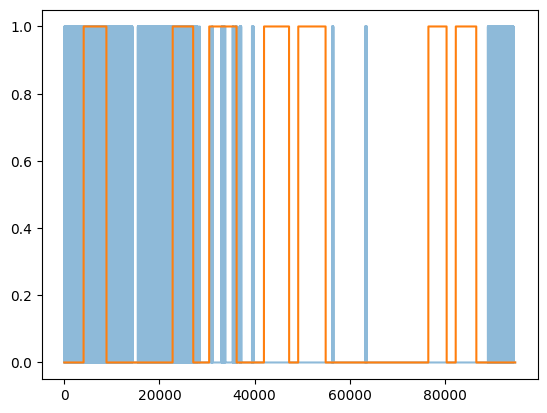

 V_PTWE2_BN :27 has accuracy = 0.6344285638943093, precision = 0.2888086642599278, recall = 0.011739500484254395, and f1 = 0.02256190422471657


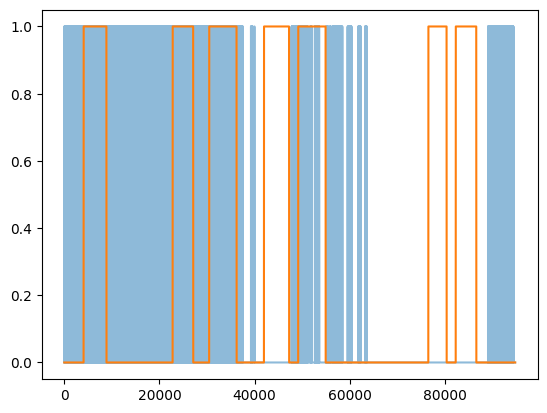

 V_PTWE2_CN :28 has accuracy = 0.6335108907758029, precision = 0.2848911651728553, recall = 0.013060194288733014, and f1 = 0.02497544548898555


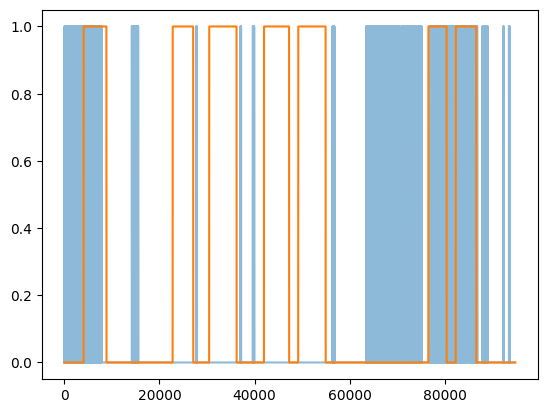

 C_CTWE7_A :29 has accuracy = 0.6247244343652761, precision = 0.12617983109786388, recall = 0.007454582807501541, and f1 = 0.014077481571800696


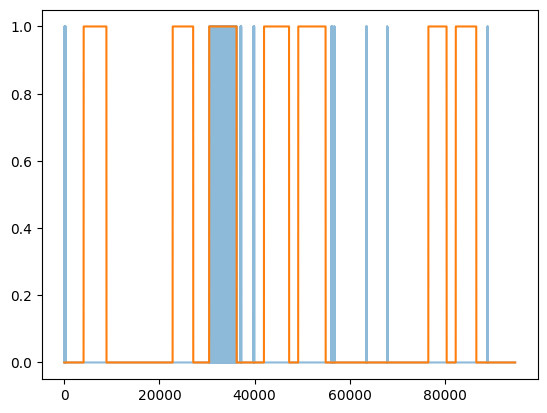

 C_CTWE7_B :30 has accuracy = 0.6503138020146617, precision = 0.7883531621790858, recall = 0.03695007777419071, and f1 = 0.07059153350154192


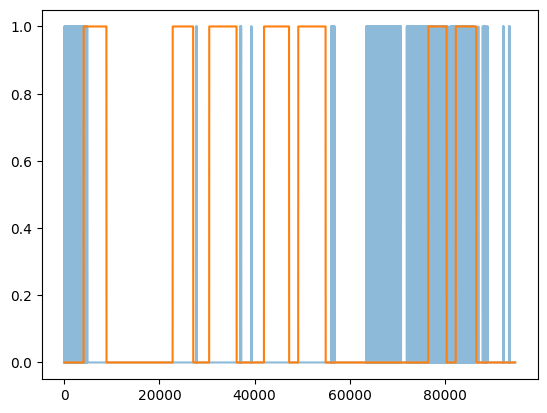

 C_CTWE7_C :31 has accuracy = 0.6280786878329202, precision = 0.12173358827278521, recall = 0.005605611481231474, and f1 = 0.01071769260984232


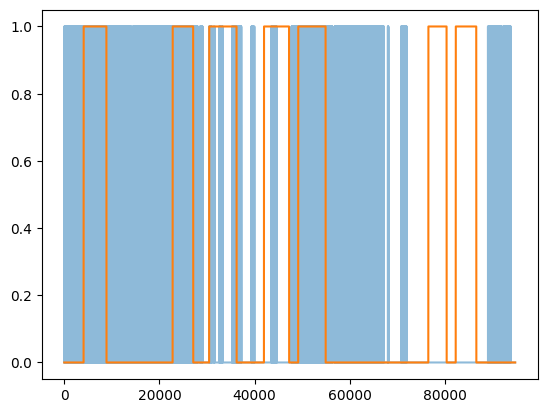

 V_PTWE5_AN :33 has accuracy = 0.6343441801592743, precision = 0.2992552471225457, recall = 0.012972148035101107, and f1 = 0.024866385372714486


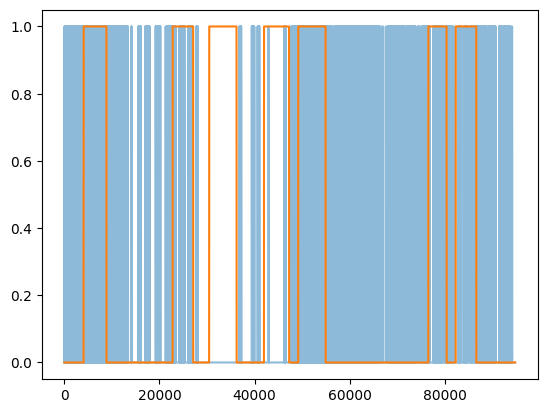

 V_PTWE5_BN :34 has accuracy = 0.6344391118611887, precision = 0.2877906976744186, recall = 0.011622105479411851, and f1 = 0.02234195604953595


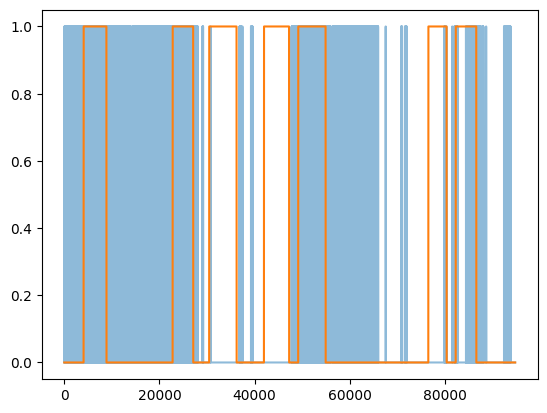

 V_PTWE5_CN :35 has accuracy = 0.6338906175834608, precision = 0.2862903225806452, recall = 0.01250256801573093, and f1 = 0.023958831303956582


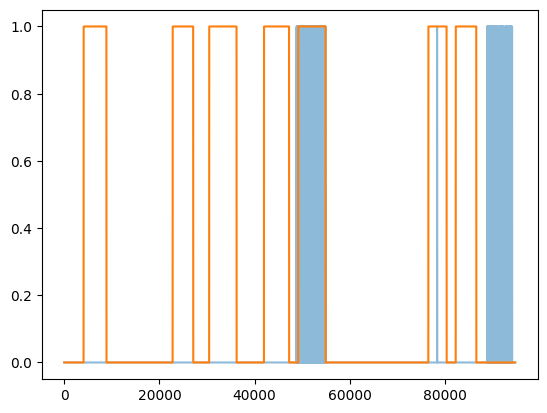

 C_CTWE2_A :36 has accuracy = 0.6645852012024682, precision = 0.8483455882352942, recall = 0.08126669210225104, and f1 = 0.14832471810804296


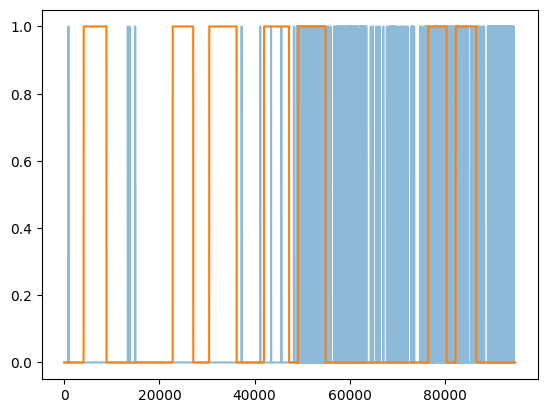

 C_CTWE2_B :37 has accuracy = 0.659332313696535, precision = 0.7259541984732825, recall = 0.08373198720394447, and f1 = 0.15014604110201824


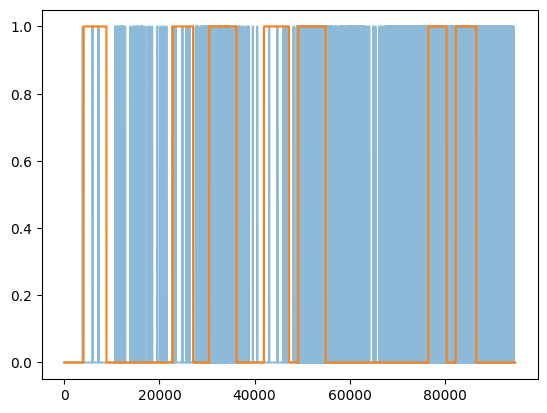

 C_CTWE2_C :38 has accuracy = 0.6407046041875428, precision = 0.5007491759065028, recall = 0.09808352654594547, and f1 = 0.16403661619260315


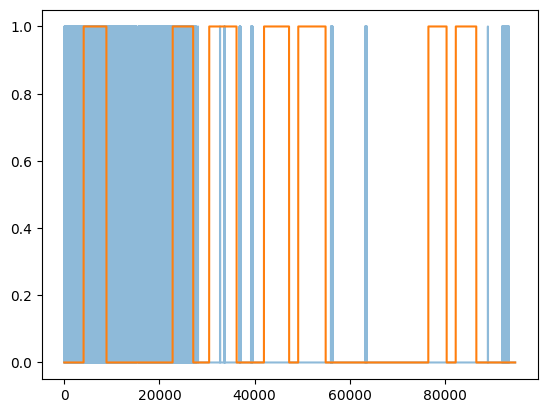

 C_CTWE4_A :40 has accuracy = 0.6300406096724857, precision = 0.22424242424242424, recall = 0.011944941742728846, and f1 = 0.02268167632634864


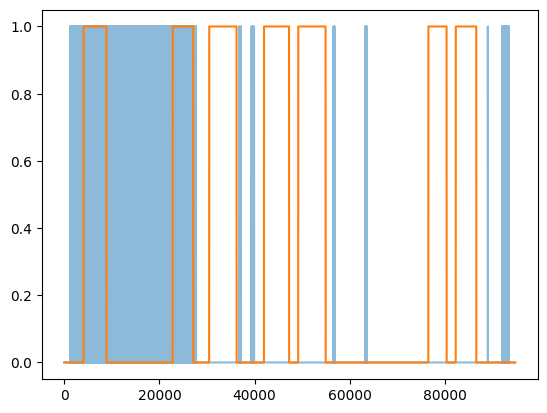

 C_CTWE4_B :41 has accuracy = 0.634006645219134, precision = 0.29345670852610706, recall = 0.013030845537522378, and f1 = 0.024953633451357274


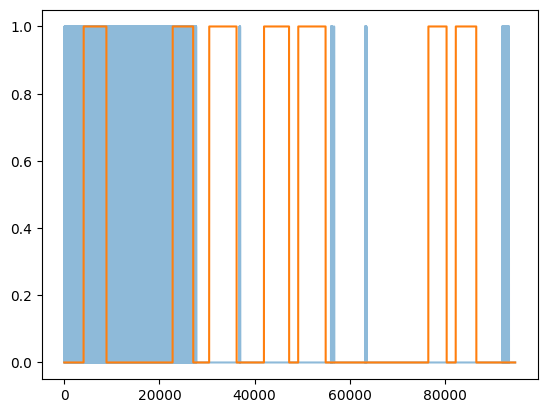

 C_CTWE4_C :42 has accuracy = 0.6339539053847371, precision = 0.2874493927125506, recall = 0.01250256801573093, and f1 = 0.02396287441991281


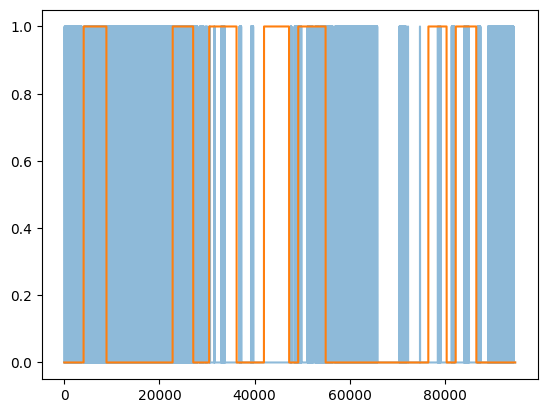

 C_CTWE6_A :44 has accuracy = 0.6287748536469595, precision = 0.21533773489080751, recall = 0.012443870513309658, and f1 = 0.023528106098440707


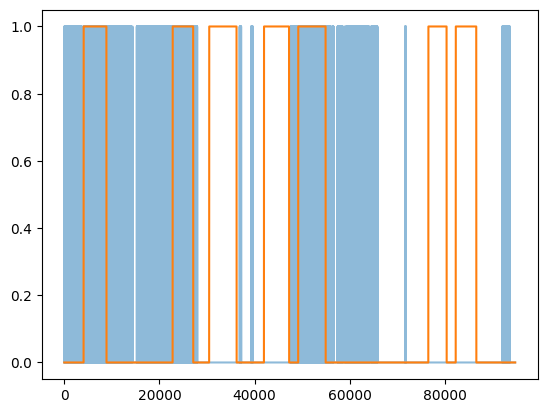

 C_CTWE6_B :45 has accuracy = 0.634280892357998, precision = 0.29858776059179554, recall = 0.013030845537522378, and f1 = 0.024971878515185602


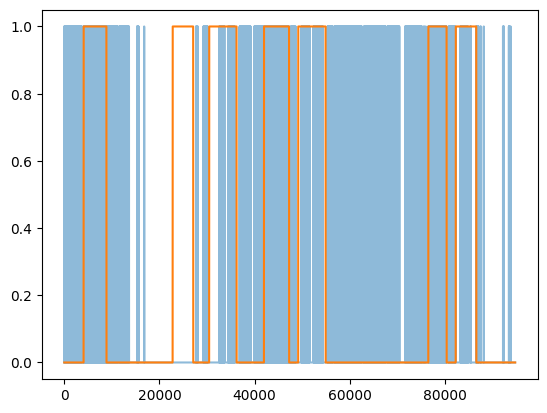

 C_CTWE6_C :46 has accuracy = 0.6348715785032435, precision = 0.3367408298256164, recall = 0.016435300677956153, and f1 = 0.03134094470561898


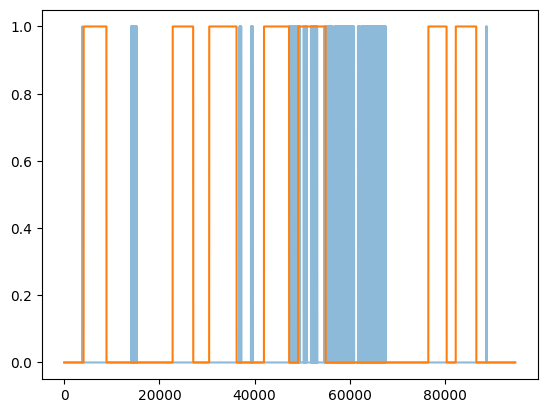

 C_CTWE10_A :48 has accuracy = 0.6205579874479195, precision = 0.020202020202020204, recall = 0.0011739500484254394, and f1 = 0.002218955426732865


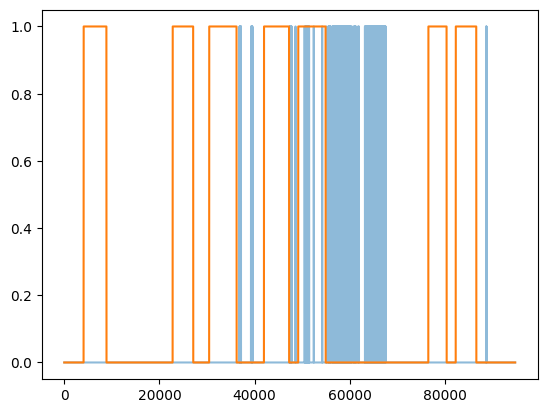

 C_CTWE10_B :49 has accuracy = 0.6229418279626602, precision = 0.015625, recall = 0.0007924162826871716, and f1 = 0.001508337755928605


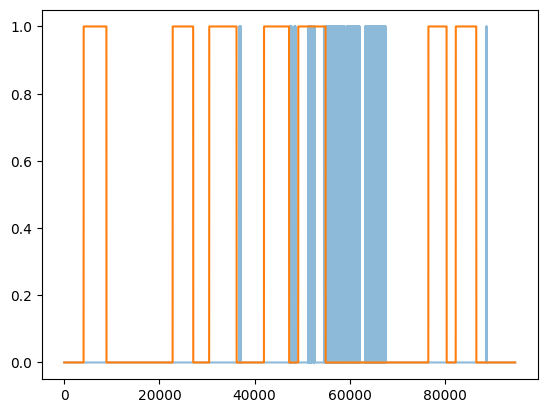

 C_CTWE10_C :50 has accuracy = 0.6235008702072675, precision = 0.011452682338758288, recall = 0.0005576262730020838, and f1 = 0.0010634725176312551


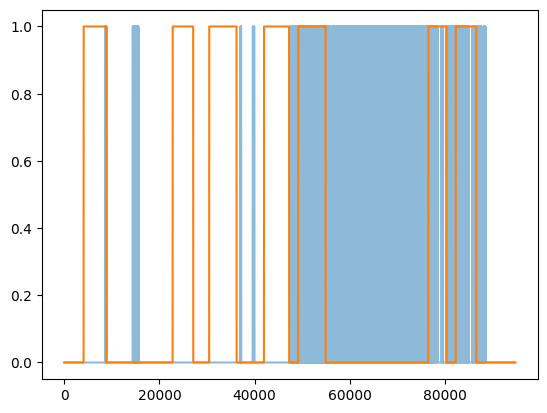

 C_CTWE8_A :52 has accuracy = 0.6241337482200305, precision = 0.135450723960766, recall = 0.008511137851084436, and f1 = 0.01601590545093058


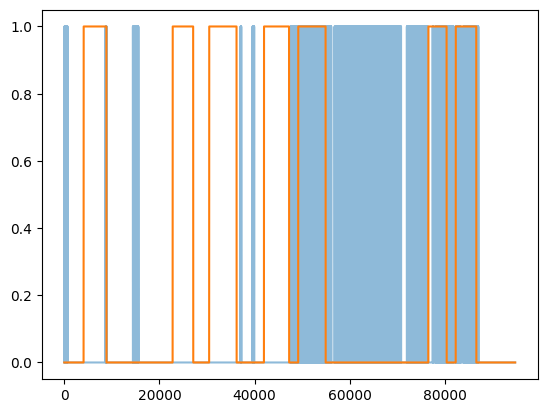

 C_CTWE8_B :53 has accuracy = 0.629418279626602, precision = 0.1875, recall = 0.009332902884982244, and f1 = 0.017780759875870168


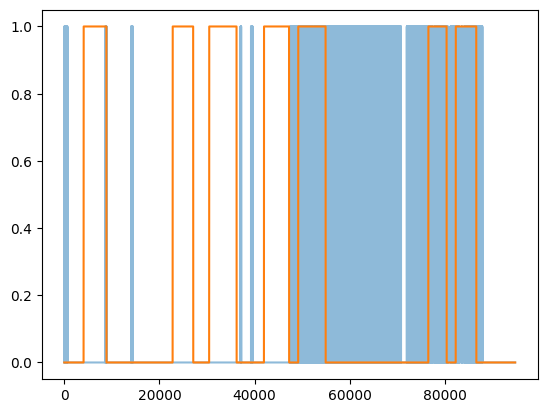

 C_CTWE8_C :54 has accuracy = 0.6307684193871631, precision = 0.2216248506571087, recall = 0.010888386699145951, and f1 = 0.020756986600274148


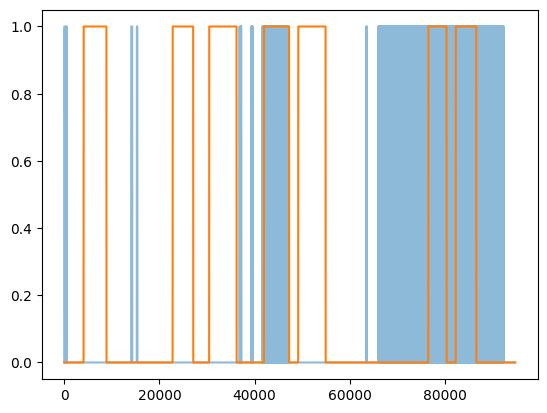

 V_PT_DIST1_AN :56 has accuracy = 0.6474763989241074, precision = 0.5885869565217391, recall = 0.06356939512223755, and f1 = 0.11474584801207852


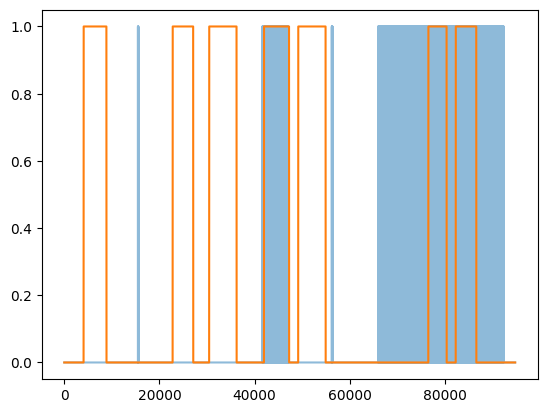

 V_PT_DIST1_BN :57 has accuracy = 0.6495859922999841, precision = 0.6328758577666874, recall = 0.05954861620638042, and f1 = 0.10885485125673972


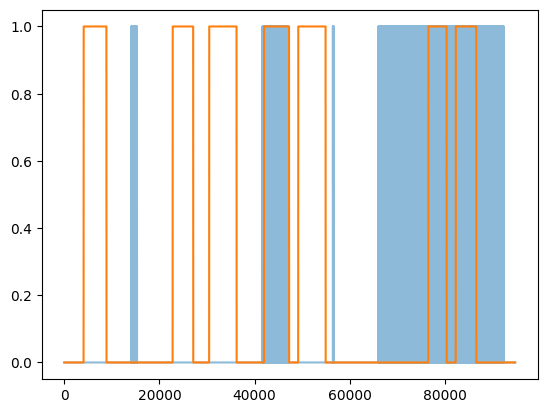

 V_PT_DIST1_CN :58 has accuracy = 0.6458203681240441, precision = 0.5673469387755102, recall = 0.06119214627417603, and f1 = 0.11046942884391227


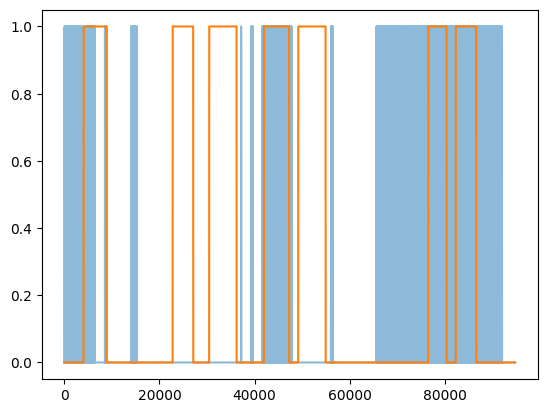

 C_CT_DIST1_A :59 has accuracy = 0.6369073361109646, precision = 0.4426981008513425, recall = 0.03967951163677985, and f1 = 0.07283109327443639


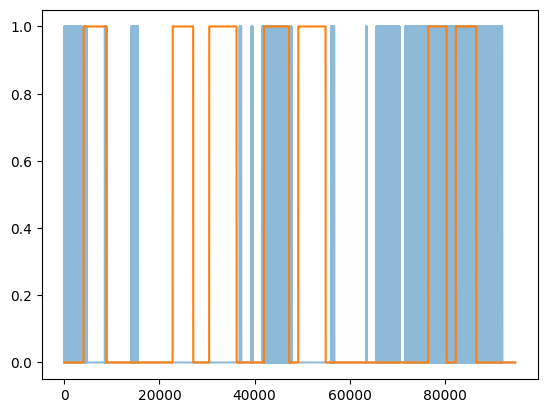

 C_CT_DIST1_B :60 has accuracy = 0.6389325457518064, precision = 0.47401315789473686, recall = 0.04229155049452646, and f1 = 0.0776547301484655


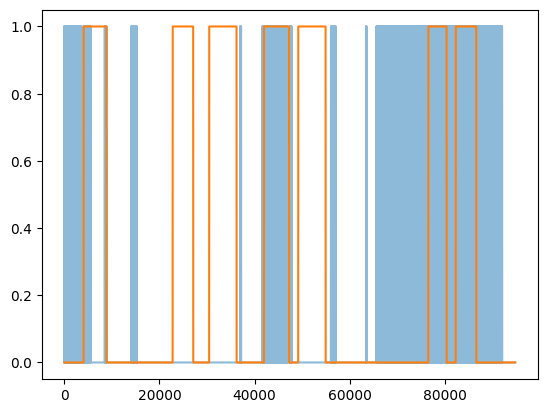

 C_CT_DIST1_C :61 has accuracy = 0.6368651442434471, precision = 0.44433962264150945, recall = 0.04146978546062865, and f1 = 0.07585966230907579


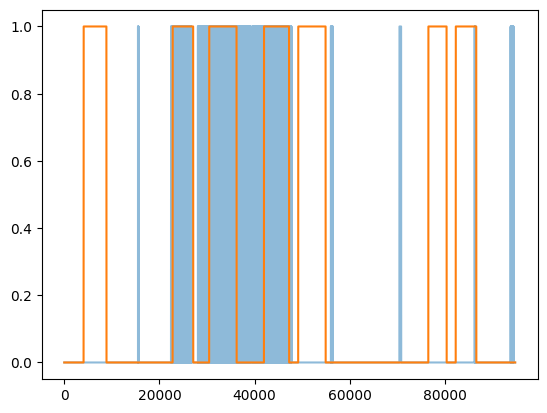

 V_PT_DIST2_AN :62 has accuracy = 0.6556405252887506, precision = 0.6754429133858267, recall = 0.08056232207319579, and f1 = 0.14395468967144767


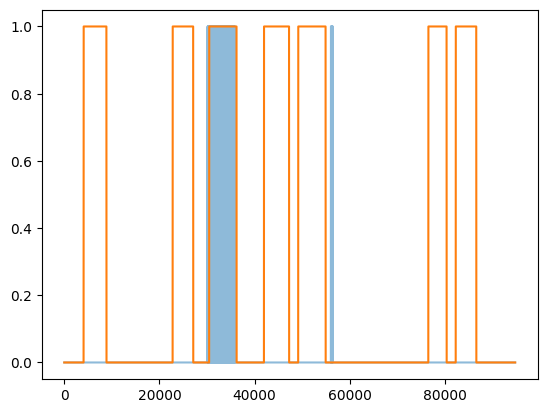

 V_PT_DIST2_BN :63 has accuracy = 0.6488159907177892, precision = 0.7511283043197937, recall = 0.034191295160390926, and f1 = 0.0654053447114305


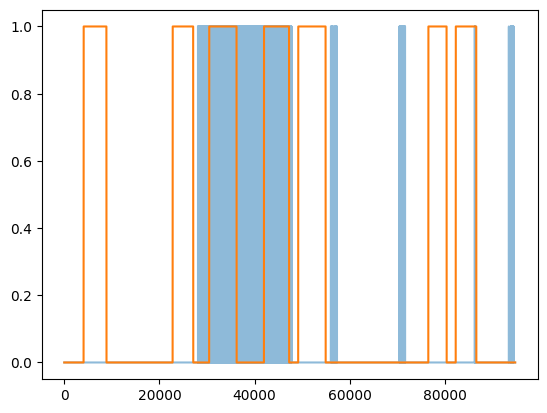

 V_PT_DIST2_CN :64 has accuracy = 0.6368229523759296, precision = 0.406478578892372, recall = 0.022833328441874797, and f1 = 0.04323783588518076


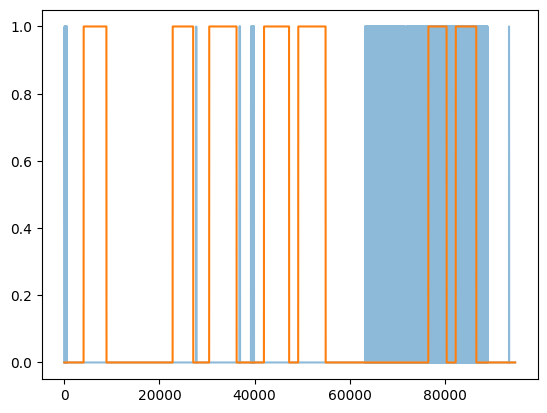

 C_CT_DIST2_A :65 has accuracy = 0.6236696376773377, precision = 0.13867627194957227, recall = 0.009039415372875885, and f1 = 0.0169725023419849


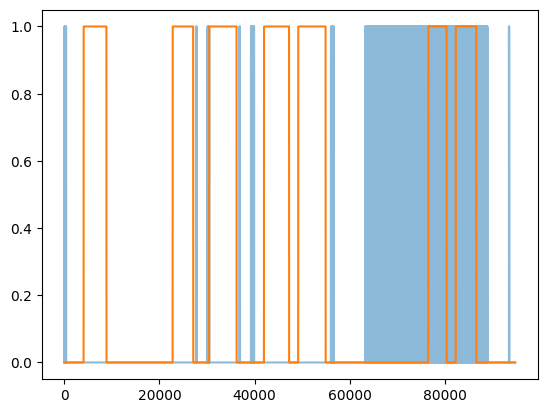

 C_CT_DIST2_B :66 has accuracy = 0.6225304572543642, precision = 0.10032664489034064, recall = 0.0063099815102867374, and f1 = 0.011873205213165452


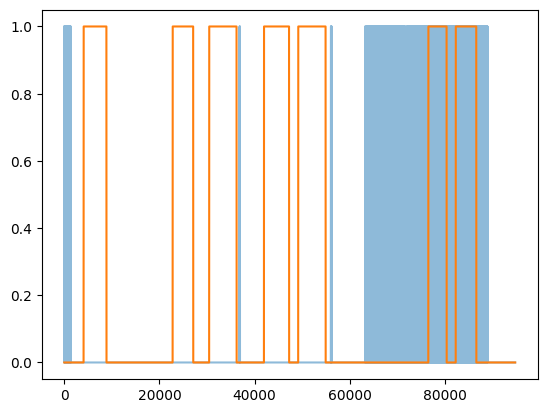

 C_CT_DIST2_C :67 has accuracy = 0.6256948473181794, precision = 0.1248008497079129, recall = 0.006896956534499457, and f1 = 0.013071531872288352


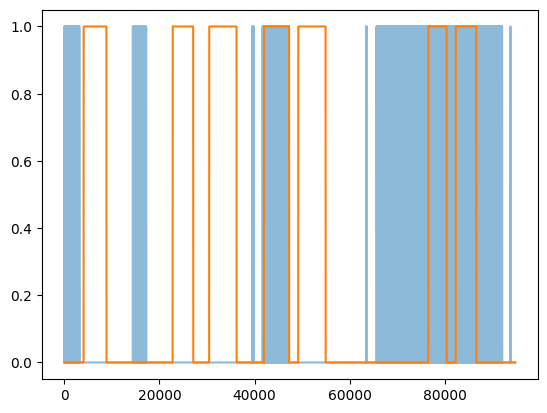

 V_PT_FDR3_AN :68 has accuracy = 0.6438373503507199, precision = 0.5386163522012578, recall = 0.06283567634197165, and f1 = 0.1125420521446594


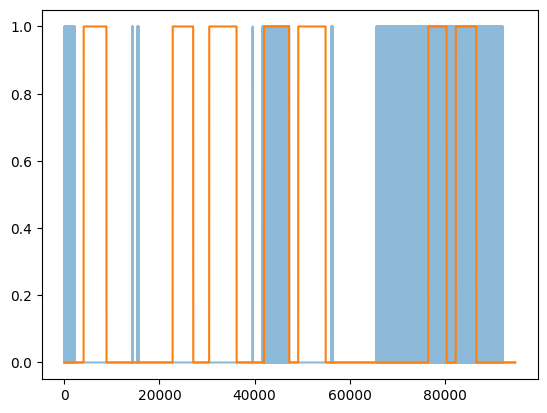

 V_PT_FDR3_BN :69 has accuracy = 0.6507040767891988, precision = 0.6444511459589868, recall = 0.0627182813371291, and f1 = 0.11431169595335526


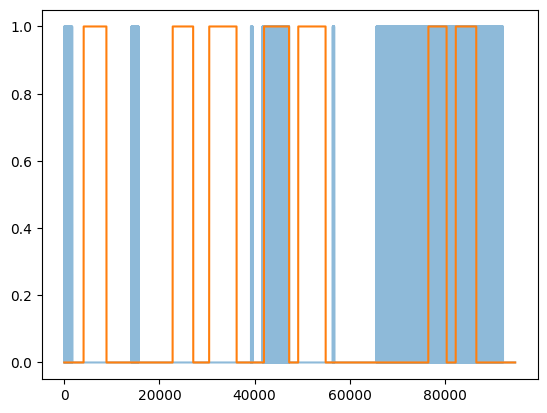

 V_PT_FDR3_CN :70 has accuracy = 0.6445229681978799, precision = 0.5468277945619335, recall = 0.06374548762950137, and f1 = 0.11418057563411749


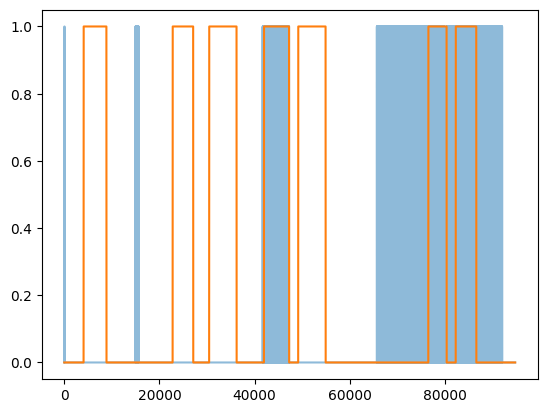

 C_CT_FDR3_A :71 has accuracy = 0.6480776330362322, precision = 0.5990500139703828, recall = 0.06292372259560355, and f1 = 0.11388505258684799


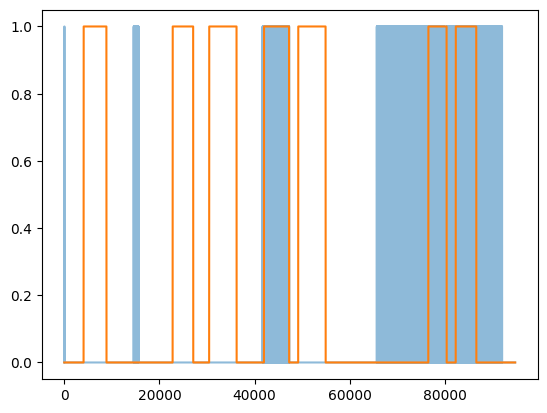

 C_CT_FDR3_B :72 has accuracy = 0.6509044881599072, precision = 0.6451708766716197, recall = 0.06371613887829072, and f1 = 0.1159784176505155


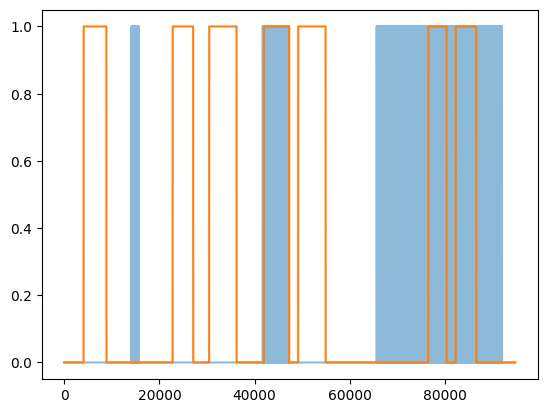

 C_CT_FDR3_C :73 has accuracy = 0.6442698169927746, precision = 0.5445696721311475, recall = 0.06239544507381211, and f1 = 0.11196250362061247


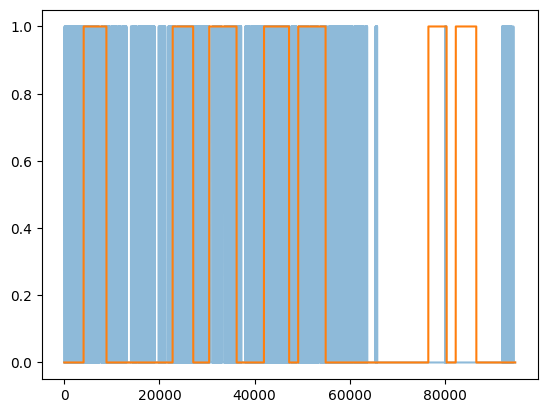

 V_PT_FDR1_AN :74 has accuracy = 0.645103106376246, precision = 0.5477949406760689, recall = 0.07181639421242626, and f1 = 0.12698495070057084


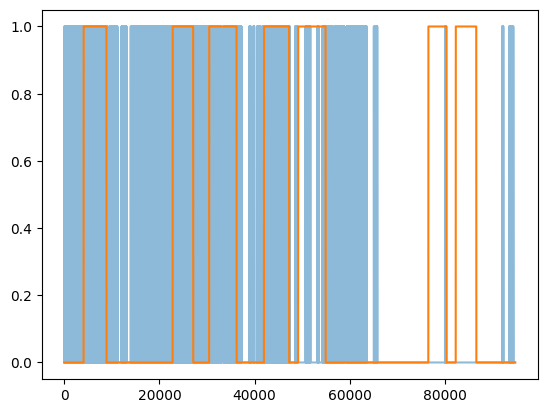

 V_PT_FDR1_BN :75 has accuracy = 0.6446706397341913, precision = 0.5436454093170511, recall = 0.07055439791036891, and f1 = 0.12489933757630861


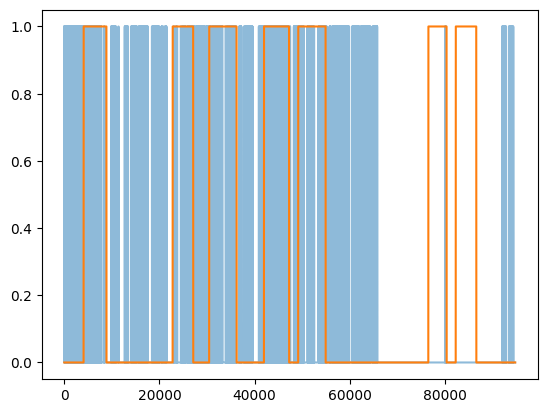

 V_PT_FDR1_CN :76 has accuracy = 0.6476979062285745, precision = 0.5750948449006918, recall = 0.07563173186980894, and f1 = 0.13368262696477667


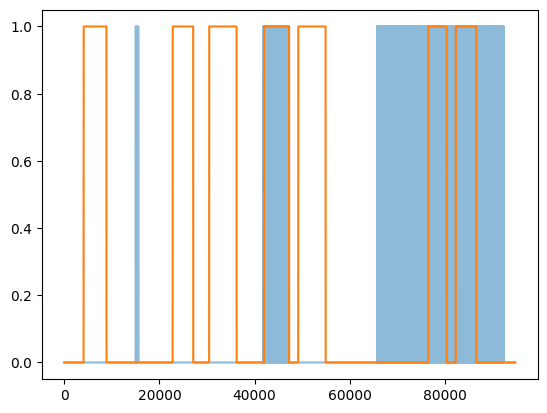

 C_CT_FDR1_A :77 has accuracy = 0.6495121565318285, precision = 0.6085839115908507, recall = 0.06949784286678602, and f1 = 0.12474976293330524


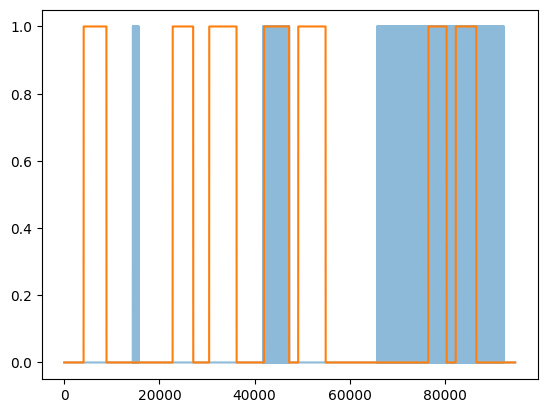

 C_CT_FDR1_B :78 has accuracy = 0.6480565371024735, precision = 0.5859469973255531, recall = 0.07073049041763273, and f1 = 0.12622427067511655


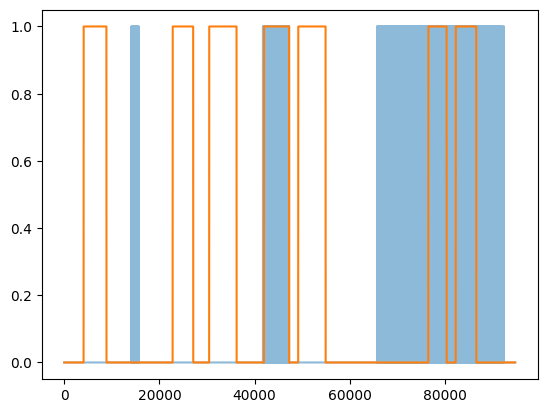

 C_CT_FDR1_C :79 has accuracy = 0.6462317388323401, precision = 0.5625585754451734, recall = 0.07046635165673701, and f1 = 0.1252445163141285


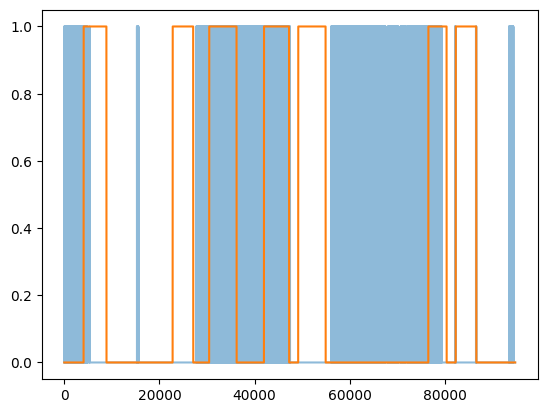

 V_PT_FDR32_AN :80 has accuracy = 0.6270660830124993, precision = 0.26527625320160997, recall = 0.021277844627711092, and f1 = 0.03939575069282183


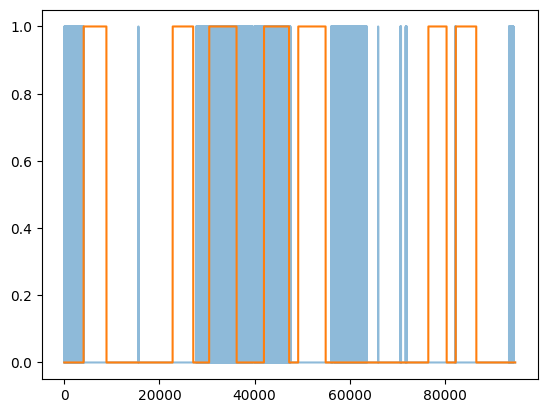

 V_PT_FDR32_BN :81 has accuracy = 0.6296292389641897, precision = 0.2748917748917749, recall = 0.01863645701875385, and f1 = 0.03490641233543138


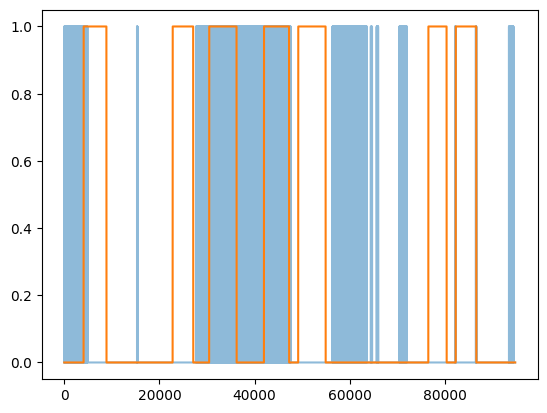

 V_PT_FDR32_CN :82 has accuracy = 0.623870049048046, precision = 0.23389261744966444, recall = 0.020456079593813282, and f1 = 0.0376217850106604


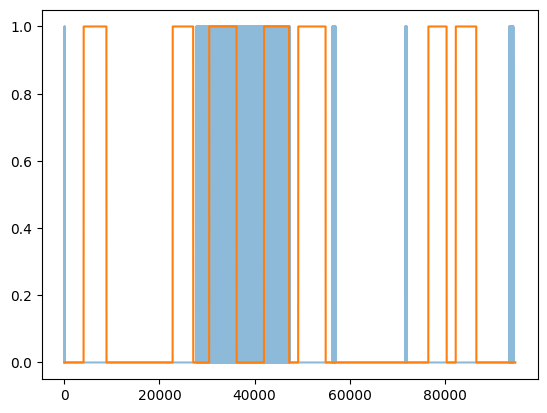

 C_CT_FDR32_A :83 has accuracy = 0.6347133590000528, precision = 0.3483695652173913, recall = 0.018812549526017668, and f1 = 0.03569737977891014


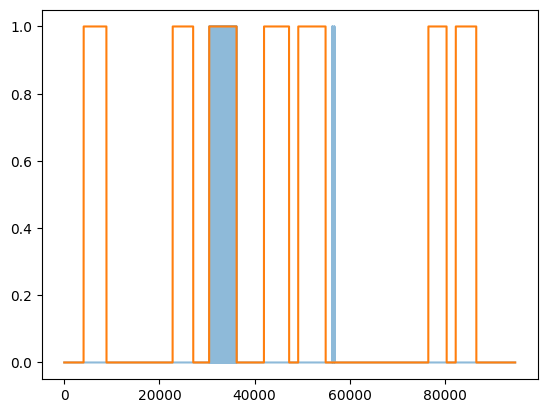

 C_CT_FDR32_B :84 has accuracy = 0.6542060017931544, precision = 0.9210182767624021, recall = 0.04141108795820738, and f1 = 0.07925853110518187


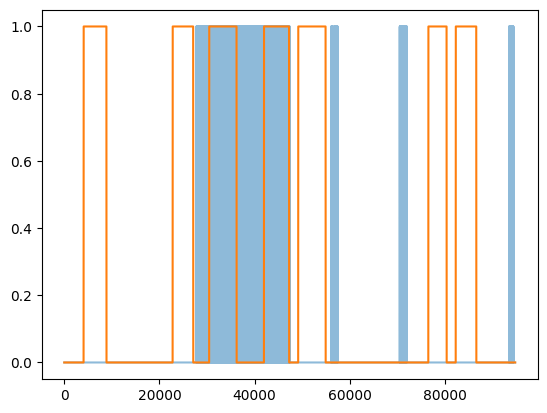

 C_CT_FDR32_C :85 has accuracy = 0.6289752650176679, precision = 0.28082736674622116, recall = 0.020720218354709007, and f1 = 0.03859294284855277


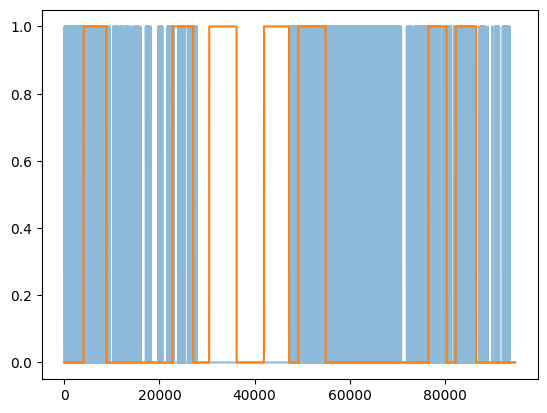

 V_PT_FDR12_AN :86 has accuracy = 0.623321554770318, precision = 0.1773049645390071, recall = 0.013206938044786194, and f1 = 0.024582775668514925


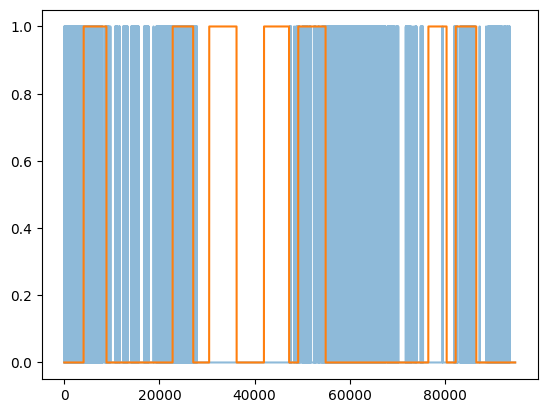

 V_PT_FDR12_BN :87 has accuracy = 0.621644428036496, precision = 0.1556151782292066, recall = 0.01191559299151821, and f1 = 0.02213619759009869


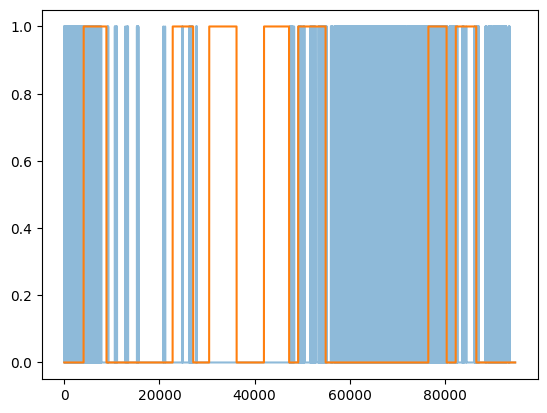

 V_PT_FDR12_CN :88 has accuracy = 0.615874690153473, precision = 0.09890485968514716, recall = 0.0084817890998738, and f1 = 0.01562373293688336


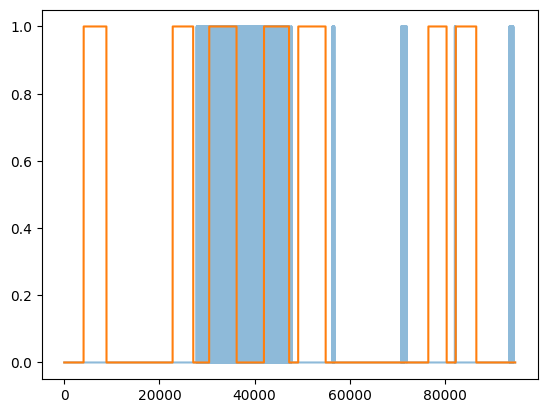

 C_CT_FDR12_A :89 has accuracy = 0.6289541690839091, precision = 0.2540106951871658, recall = 0.016728788190062512, and f1 = 0.03139025800589256


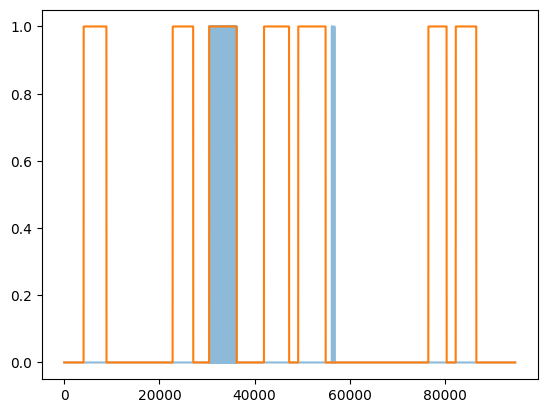

 C_CT_FDR12_B :90 has accuracy = 0.6534781920784769, precision = 0.8818011257035647, recall = 0.04138173920699674, and f1 = 0.07905359946176273


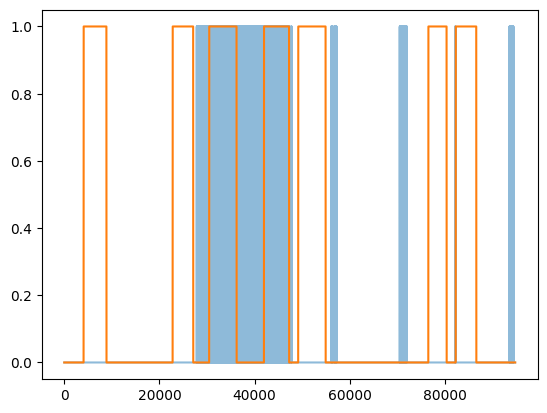

 C_CT_FDR12_C :91 has accuracy = 0.625958546490164, precision = 0.22890625, recall = 0.01719836820943269, and f1 = 0.03199301176534818


In [31]:
co = 0
for var1_index, var2_indices in adj_list.items():
    set_zero = np.zeros(len(data_test))
    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1
    violation = []

    for index, i in enumerate(rsum_list[co]):
      if i > thresholds[co]:
        set_zero[index]=1

    plt.plot(set_zero, alpha = 0.5)
    plt.plot(y_true)
    plt.show()
    accuracy, precision, recall, f1= get_scores(y_true, set_zero)

    print(f"{cols[var1_index]} :{var1_index+1} has accuracy = {accuracy}, precision = {precision}, recall = {recall}, and f1 = {f1}")
    co +=1

In [32]:
len(adj_list)

81